# Sentiment Analysis in Python

## Part 1: Sentiment Analysis Nuts and Bolts

>> 1. Welcome!

Welcome to the course! In this course, we will build upon some of your Python skills and introduce methods for sentiment analysis using movie and product reviews, Twitter data and a lot of literary examples.

>> 2. What is sentiment analysis?

Let's start with defining what sentiment analysis is. Sentiment analysis, also called opinion mining, is the process of understanding the opinion of an author about a subject. In other words, "What is the emotion or opinion of the author of the text about the subject discussed?"

>> 3. What goes into a sentiment analysis system?

In a sentiment analysis system, depending on the context, we usually have 3 elements: First is the opinion or an emotion. An opinion (also called "polarity") can be positive, neutral or negative. An emotion could be qualitative (like joy, surprise, or anger) or quantitative (like rating a movie on the scale from 1 to 10).

>> 4. What goes into a sentiment analysis system?

The second element in a sentiment analysis system is the subject that is being talked about, such as a book, a movie, or a product. Sometimes one opinion could discuss multiple aspects of the same subject. For example: "The camera on this phone is great but its battery life is rather disappointing."" The third element is the opinion holder, or entity, expressing the opinion.

>> 5. Why sentiment analysis?

Sentiment analysis has many practical applications. In social media monitoring, we don't just want to know if people are talking about a brand; we want to know how they are talking about it. Social media isn't our only source of information; we can also find sentiment on forums, blogs, and the news. Most brands analyze all of these sources to enrich their understanding of how customers interact with their brand, what they are happy or unhappy about, and what matters most to consumers. Sentiment analysis is thus very important in brand monitoring, and in fields such as customer and product analytics and market research and analysis.

>> 6. Let's look at movie reviews!

Let's look at the first dataset we will use in this course: a sample of IMDB movie reviews. We have two columns: one for the text of the review, and a second one called "label", which expresses the overall sentiment: the category or class 1 means positive and 0 means negative.

>> 7. How many positive and negative reviews?

Let's find out how many positive and negative reviews we have in the data. To do this, we call the .value_counts() method on the "label" column. The output is the number of negative reviews (the 0 class) and positive reviews (the class 1).

>> 8. Percentage of positive and negative reviews

If we want to see the number of positives and negatives as a percentage, we can divide the expression by the number of rows, which we obtain with the len() method. We see that the sample is rather balanced: around half of the reviews are positive and half are negative.

>> 9. How long is the longest review?

How long is the longest review? To find that, we create a pandas Series called length_reviews by selecting the review column of the dataset, followed by .str.len(). Str is short for string. We need to call the string function to transform the Series of reviews to a string. If we skip it, we get an AttributeError when the len() function is called. The result returns a pandas Series with the number of characters in each review. To find the length of the longest review, we need to call the max() function on the length_reviews Series.

>> 10. How long is the shortest review?

To find the shortest review, we call the min() function on the length_reviews Series, instead of the max() function.

>> 11. Let's practice!

Let’s practice what we’ve learned in the exercises!

In [1]:
import pandas as pd
## Movie Data 
movie_data =  pd.read_csv(r'C:\Users\Garvit Anand\Desktop\Machine Learning\ML_Complete\ML_DC\NLP\Course_2\movie_data.csv')
tweets_data =  pd.read_csv(r'C:\Users\Garvit Anand\Desktop\Machine Learning\ML_Complete\ML_DC\NLP\Course_2\Tweets.csv')
amazon_data =  pd.read_csv(r'C:\Users\Garvit Anand\Desktop\Machine Learning\ML_Complete\ML_DC\NLP\Course_2\amazon_reviews_sample.csv')

In [8]:
movie_data.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [9]:
print("Number of positive and negative reviews in the dataset:")
movie_data.label.value_counts()

Number of positive and negative reviews in the dataset:


0    3782
1    3719
Name: label, dtype: int64

In [10]:
print("Percentage of positive and negative reviews in the dataset:")
movie_data.label.value_counts() / len(movie_data) * 100

Percentage of positive and negative reviews in the dataset:


0    50.419944
1    49.580056
Name: label, dtype: float64

In [11]:
print()
length_reviews =  movie_data.review.str.len()
# print(length_reviews)

# type(length_reviews)
# pd.core.series.Series
print("Length of the Longest Review:", max(length_reviews))
print("Length of the Longest Review:", min(length_reviews))


Length of the Longest Review: 10321
Length of the Longest Review: 52


### What are the three typical elements of a sentiment analysis system?
Ans :Opinion, subject, and opinion holder.

### How many positive and negative reviews are there?
As a first step in a sentiment analysis task, similar to other data science problems, we might want to explore the dataset in more detail.

You will work with a sample of the IMDB movies reviews. A dataset called movies has been created for you. It is a sample of the data we saw in the slides. Feel free to explore it in the IPython Shell, calling the .head() method, for example.

Be aware that this exercise uses real data, and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real data).

### Instructions

> Find the number of positive and negative reviews in the movies dataset.

> Find the proportion (percentage) of positive and negative reviews in the dataset.

In [37]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movie_data.label.value_counts())
print()
print()
# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movie_data.label.value_counts() / len(movie_data) * 100 )

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64


Proportion of positive and negative reviews:  0    50.419944
1    49.580056
Name: label, dtype: float64


### Longest and shortest reviews

In this exercise, you will continue to work with the movies dataset. You explored how many positive and negative reviews there are. Now your task is to explore the review column in more detail.

### Instructions 1/2

> Use the review column of the movies dataset to find the length of the longest review.

> Similarly, find the length of the shortest review.

In [40]:
movies = movie_data 
length_reviews = movie_data.review.str.len()

# How long is the longest review
print(max(length_reviews))

length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

10321
52


## Sentiment analysis types and approaches

>> 1. Sentiment analysis types and approaches

Welcome back! In the previous video, we learned what sentiment analysis is and why it is useful. But how do we even start with a sentiment analysis task?

>> 2. Levels of granularity

    -- Document Level 
    
    -- Sentence Level 
    
    -- Aspect Level

Sentiment analysis tasks can be carried out at different levels of granularity. First is document level. This is when we look at the whole review of a product, for example. Second is the sentence level. This refers to determining whether the opinion expressed in each sentence is positive, negative, or neutral. The last level of granularity is the aspect level. The aspect refers to expressing opinions about different features of a product. Imagine a sentence such as "The camera in this phone is pretty good but the battery life is disappointing." It expresses both positive and negative opinions about a phone and we might want to be able to say which features of the product clients like and which they don't.

>> 3. Type of sentiment analysis algorithms

The algorithms used for sentiment analysis could be split into 2 main categories. The first is rule or lexicon based. Such methods most commonly have a predefined list of words with a valence score. For example, nice could be +2, good +1, terrible -3, and so on. The algorithm then matches the words from the lexicon to the words in the text and either sums or averages the scores in some way. As an example, let's take the sentence, 'Today was a good day.' Each word gets a score, and to get the total valence we sum the words. In this case, we have a positive sentence. A second category is automated systems, which are based on machine learning. This is going to be our focus in this course. The task is usually modeled as a classification problem where using some historical data with known sentiment, we need to predict the sentiment of a new piece of text.

>> 4. What is the valence of a sentence?

We can calculate the valence score of a text, using Python's textblob library. We continue working with our 'Today was a good day' string. We import the TextBlob function from the textblob package and apply it to our string. A TextBlob object is like a Python string, which has obtained some natural language processing skills. We can call different properties of the TextBlob object. We are interested in its sentiment; that's why we call sentiment on our TextBlob. The sentiment property returns a tuple: polarity, which is measured on the scale from [-1.0 to 1.0], where -1.0 is very negative, 0 is neutral and +1.0 is very positive. Our example 'Today was a good day' carries positive emotion and thus will have a positive polarity score: 0.7. The second element in the tuple displays the subjectivity, measured from [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. So our example is rather positive and subjective.

>> 5. Automated or rule-based?

Which method should one use? A machine learning sentiment analysis relies on having labeled historical data whereas lexicon-based methods rely on having manually created rules or dictionaries. Lexicon-based methods fail at certain tasks because the polarity of words might change with the problem, which will not be reflected in a predefined dictionary. However, lexicon-based approaches can be quite fast, whereas Machine learning models might take a while to train. At the same time, machine learning models can be quite powerful. So, the jury is still out on that one. Many people find that a hybrid approach tends to work best in many, usually complex scenarios.

>> 6. Let's practice!

Now let's test what we've learned by solving some exercises!

In [16]:
from textblob import TextBlob

text_1 = "Today was a good day."
text_2 = "Today was a bad day."

my_valence_1 = TextBlob(text_1)
print("Text 1",my_valence_1.sentiment)

my_valence_2 = TextBlob(text_2)
print("Text 2", my_valence_2.sentiment)

Text 1 Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Text 2 Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


### Detecting the sentiment of Tale of Two Cities

In the video we saw that one type of algorithms for detecting the sentiment are based on a lexicon of predefined words and their corresponding polarity score. Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the textblob library in Python.

You will work with the two_cities string. It contains the first sentence of Dickens's Tale of Two Cities novel. Feel free to explore it in the Shell.

### Instructions

> Create a text blob object from the two_cities string.

> Print out the polarity and subjectivity.

In [54]:

# Import the required packages
from textblob import TextBlob

two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."


# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


### Comparing the sentiment of two strings

In this exercise, you will compare the sentiment of two different strings. A string called annak has been defined for you and it contains the first sentence of Anna Karenina. A second string called catcher has been created and it contains the first sentence of The Catcher in the Rye. Feel free to explore both in the IPython Shell.

Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?

### Instructions

> Import the required function from the appropriate package.

> Create a text blob object from the annak string.

> Create a text blob from the catcher string as well.

> Print out the polarity and subjectivity of each of the created blobs.

In [59]:
annak =  " Happy families are all alike; every unhappy family is unhappy in its own way"
catcher =  "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


### What is the sentiment of a movie review?

In a previous exercise, you detected the sentiment of the first sentence of the Tale of Two Cities novel by Dickens. Now you will continue to work with the movie reviews dataset. Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called titanic as it discusses the Titanic movie. Feel free to explore it in the Shell.

Can you calculate the polarity and subjectivity of the titanic string? This review is positive (i.e. has a label of 1). Is the polarity score also positive?

### Instructions

> Import the required functionality.

> Create a text blob object from the titanic string.

> Print out the result of its sentiment property.


In [17]:
titanic =  "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


### Let's build a word cloud!

> 1. Let's build a word cloud!

Welcome back! Chances are high that you have seen a word cloud before.

> 2. Word cloud example

A word cloud is an image composed of words with different sizes and colors. They can be especially useful in sentiment analysis. Have you ever wondered how such an image is generated? In this video, we will learn how to create a word cloud in Python.

> 3. How do word clouds work?

Word clouds (also called tag clouds) are used across different contexts. In the most common type of word clouds - and the one we will be using in this course - the size of the text corresponds to the frequency of the word. The more frequent a word is, the bigger and bolder it will appear on the word cloud.

> 4. A word cloud example

Remember how we found the longest movie review? This word cloud is generated using only the words in one of the longest reviews. Which movie do you guess the review is talking about? I think we can agree it is about the Titanic!

> 5. Why word clouds?

Why are word clouds so popular? First of all, they can reveal the essential. We saw in our word cloud, the word Titanic really popped out. Second, unless told otherwise, they will plot all the words in a text, and a quick scan of the image can provide an overall sense of the text. Last but not least, they are easy to understand and quite fun. However, they have their drawbacks. Sometimes they tend to work less well. All the words plotted on the cloud might seem unrelated and it could be difficult to draw a conclusion based on a crowded word cloud. Secondly, if the text we work with is large, a word cloud might require quite a lot of preprocessing steps before it appears sensible and uncluttered.

> 6. Let's build a word cloud in Python!

Now let's create a word cloud in Python.To do that, we can use the WordCloud function from the wordcloud package. We will have to import matplotlib.pyplot as well, which will allow wordcloud to plot on its base. Let's define a string, called two_cities, which captures the first sentence of Dickens' Tale of Two Cities. Note how the text carries many emotionally charged words.

> 7. Define the WordCloud object

After we have imported the package, we build the cloud by calling the WordCloud function, followed by the generate method, which takes as argument the text, in our case - the two_cities string. The WordCloud function has many arguments. We will not cover all of them here but if you want to learn what they are, just type ?WordCloud in the Shell. You can change things such as the background color, the size and font of the words, their scaling and others. One interesting argument you can specify is the stopwords, which will remove words such as 'the', 'and', 'to', 'from', and so on. We will cover what stopwords are in detail in a later video. The result cloud_two_cities is a wordcloud object.

> 8. Dislaying the word cloud!

If we want to display the generated word cloud object, we need to use some matplotlib functionality. We call plt.imshow(), specifying our cloud_two_cities as an argument. We also specify the interpolation to be bilinear. All this does is make the image appear more smoothly. The imshow() function thus creates the figure. We specify we don't want the image to display x and y axis, and finally, call the show method. The imshow() function has created the figure but we need to call show() to display it. We see the word cloud we generated on this piece of text. Which words pop out the most?

> 9. Let's practice!

Let's practice building different word clouds in the exercises!

It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.


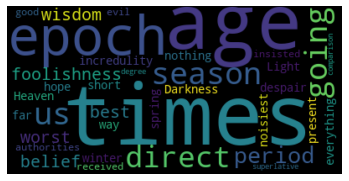

In [20]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."
print(two_cities)
cloud_two_cities =  WordCloud().generate(two_cities)
plt.imshow(cloud_two_cities, interpolation = 'bilinear')
plt.axis('off')
plt.show()


### Your first word cloud
We saw in the video that word clouds are very intuitive and a great and fast way to get a first impression on what a piece of text is talking about.

In this exercise, you will build your first word cloud. A string east_of_eden has been defined for you. It contains one of the first sentences of John Steinbeck's novel East of Eden. You can inspect its contents in the IPython Shell.

The matplotlib.pyplot package has been imported for you as plt.

### Instructions 1/2

> Import the required package to build a word cloud.

> Generate a word cloud using the east_of_eden string. The background color has been specified as white.

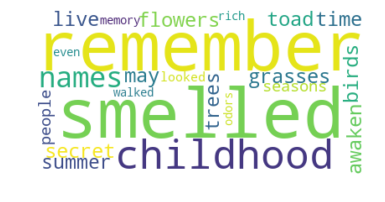

In [75]:
from wordcloud import WordCloud

# Generate the word cloud from the east_of_eden string
east_of_eden=  "I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich."

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

### Word Cloud on movie reviews
You have been working with the movie reviews dataset. You have explored the distribution of the reviews and have seen how long the longest and the shortest reviews are. But what do positive and negative reviews talk about?

In this exercise, you will practice building a word cloud of the top 100 positive reviews.

What are the words that pop up? Do they make sense to you?

The string descriptions has been created for you by concatenating the descriptions of the top 100 positive reviews. A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as my_stopwords. Recall that the interpolation argument makes the word cloud appear more smoothly.

### Instructions

> Import the wordcloud function from the respective package.

> Apply the word cloud function to the descriptions string. Set the background color as 'white', and change the stopwords argument.

> Create a wordcloud image.

> Finally, do not forget to display the image

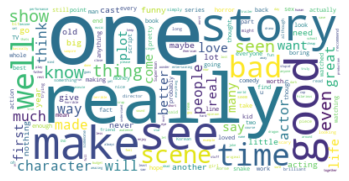

In [21]:
# Import the word cloud function  
from wordcloud import WordCloud

my_stopwords =  {'since', 'her', "what's", 'have', "wouldn't", 'movie', 'they', "isn't", 'against', 'are', 'ourselves', 'we', 'down', 'an', "they've", 'yourselves', "she'll", 'also', 'other', 'myself', 'because', 'who', 'i', 'up', 'a', 'out', 'them', 'watch', 'k', "hasn't", 'shall', "they'd", 'where', 'else', 'am', "i'm", 'its', 'and', "weren't", 'itself', "who's", "i've", "where's", 'yours', 'should', 'which', "that's", 'she', 'some', 'in', "she'd", 'this', 'that', 'those', 'me', 'after', "i'll", 'to', "you've", 'movies', 'few', 'why', 'is', 'until', 'by', 'like', 'br', 'through', 'however', 'very', "you'll", 'over', 'at', 'does', 'off', 'com', 'into', 'the', "couldn't", 'been', 'him', 'he', "mustn't", 'their', 'otherwise', 'when', 'above', 'yourself', 'theirs', "we're", 'himself', 'did', "how's", 'herself', "won't", 'having', 'do', 'only', 'below', 'before', 'no', "here's", 'while', 'more', "you'd", 'on', "it's", 'nor', 'once', "we've", 'but', 'too', 'our', 'ours', "don't", "they'll", 'between', "they're", 'with', 'during', 'themselves', 'would', 'than', "aren't", 'so', 'were', "haven't", 'his', 'under', 'there', "he's", 'what', "shouldn't", 'can', 'about', "doesn't", "we'll", 'or', 'films', "wasn't", 'www', 'hers', 'being', 'most', 'of', "when's", "she's", 'could', 'be', 'not', 'film', 'any', 'my', "didn't", "hadn't", "he'd", 'your', 'for', 'here', "i'd", 'then', 'http', 'such', 'you', 'if', 'same', 'was', 'as', 'whom', "shan't", 'doing', "he'll", 'own', "there's", "why's", 'had', 'these', 'has', 'both', 'further', "can't", 'again', 'r', 'all', 'just', "let's", 'from', 'ought', 'how', 'ever', "we'd", 'cannot', "you're", 'each', 'it', 'get'}

desc = """{rant start} I didn't want to believe them at first, but I guess this is what people are talking about when they say South Korean cinema has peaked and may even be going downhill. After the surprisingly fun and moving monster movie "Gwoemul" (aka "The Host") of 2006-- which actually succeeded in making a sharp satire out of a B-movie genre-- successive Korean blockbusters have become more and more generic, even though their budgets (mainly spent on special effects) have become more and more fantastic. Do South Korean movie-makers really want to squander all the audience and investor goodwill, which their industry has built up since the 1999 break-out film "Shiri/Swiri", by making a whole series of big budget mediocre movies like mainland China did? {rant end}<br /><br />The only "reason" I can fathom for making this movie is to dupe the investors into financing the most detailed and fluid digital animation of a Korean/ East Asian-styled dragon I have seen to date, for the final scenes. Now if they had introduced that dragon at the beginning and given it more personality and purpose like in the 1996 "Dragonheart", the movie might have had a few more redeeming qualities other than having lots of digitally animated dragons. Remember "Dungeons & Dragons" in 2000? Hasn't anyone learnt that the trick is not how MUCH special effects you use, but how WELL you use it? I hope there are more (and better) Korean legends they can use, because they have just killed a lot of international interest in Korean dragon legends with the way they filmed this one.<br /><br />In short, I agree with all the negative reviews gone before and wonder how Koreans felt about having their folk anthem "Arirang" being played at the very end. As a creature feature, I would have given it at least 5 stars out of 10 if the special effects or action sequences had been worth it, but I've seen many video games with better camera work and scripting (just less dragons). zero day is based of columbine high school massacre. and its a video diary of two boys. at first you don't know whats going to happen you think it is just a bad student film. until they start talking about the horrible things they are going to do in this quite school. until they start talking about pipe bombs and guns and going shooting in the woods. they is a lot to say about this movie. all know this film is well a film you forget you watching a film and watching a real video two boys made.<br /><br />the two boys act like they are in a weird cult. they burn all there stuff. like play station games books dvds homework stuff school stuff. these two boys can be anybody your friends you brothers or the people you see walking down the street. it goes through there daily actives (and that is making a gun. in the videos they make it mentions the bullying that happens to them and how people said stuff about there clothes and the things you are into I'm not saying its right but many people do do things like that.<br /><br />and also the thing is with this people are suspected to like it because of the sensitive topic they have chosen on this film.<br /><br />so thats my review on zero day.<br /><br />and lets just say the end shooting scene is messed up. you have a strong stomach. Holden was actually 55 years old at filming but looked near 70 and he only lived another 8 years. At one point Holden said, "I am over twice your age." Okay, try triple grandpa! The "old enough to be your father" theme they were shooting for didn't work. Granted senior citizens sometimes wind up with legal teens. More power to them, but that doesn't mean I want to watch it. It's not a matter of judgment but the digestive track. I like my food where it belongs. Lenz is fun to watch and the 70s cars, clothes, furniture, etc. make it worth it if it comes on cable late at night and you want to watch something to wind down for bed. It would have been nice to see the blonde friend of Lenz, the one who hocked her guitar, get more scenes. Pleasingly spacey... Who was this chick? I'm going to try and find out. yes i have a copy of it on VHS uncut in great condition that i transfered to DVD and if anyone one wants to bring back the memories of a Christmas classic please emil me at dmd2222@verizon.net.i searched everywhere and i found nothing on this and i thought that i cant be the only one on this planet that has this classic on tape there has to be other people and if they do i fit in with them being that very very few that has this classic so i consider myself lucky and i have all of the muppets Christmas except one that john denver did with the muppets again i thinks its called a smokey mountain holiday im not to sure but its close. yeah cheap shot i know, but this movie is a great example of how a collection of signifiers of 'deepness' (political turmoil, love/lust) can be combined haphazardly to great critical acclaim (see also 'american beauty'). kaufman's movie plods along with gratuitous sex scenes interspersed with often painful dialog sequences (in one scene i counted three different 'generic European' accents affected by the actors) and displays of state might run amok, yet fails to tie them together into the coherent meditation kundera offered. and in its over-long three hours it manages almost completely to gloss over franz,the missing fourth piece in the love triangle that lies at the heart of the plot, and in this manner sacrifices the novel's central mechanism of displaying the spectrum of emotions and of power relations that obtain in love affairs. it also fails to even include token screen time for tomas' son, used in the novel to exemplify some of the political points kundera was making in the novel. combined with the overweening soundtrack, these flaws make this movie's three hours unbearably weighty in tone yet light in content. wow! i watched the trailer for this one and though 'nah, this one is not for me'. i watched my husband and our friend's faces during the trailer, and knew this was a 'boy movie'. i mean, hallo! a bunch of chick barmaids that dance - another striptease?<br /><br />then, i started watching it, it didn't look all that bad. so i carried on watching. i watched it right to the end. what an awesome movie. if anything, this is a chick-flick. these girls have attitude. it is really a feel-good movie, and a bit of a love story. really leaves you with a nice feeling.<br /><br />basically, the story of a small-town girl making it big in the city, after going through the usual big-city c**p. there have been a couple of these, it is almost a new urban legend. but it also makes you think of your life, and what you have achieved. well, me anyway. i think it is because the whole working in a bar scenario is very familiar, not just for me, but for many people i know. Don't trust the trailers for this one - it is aimed at bringing the men in. where would one start a review of the film Snitch'd? James Cahill, god rest his soul, made one of the most daring insights into the human psyche since Encino Man. his beautiful story unravels around a drug squad cop McClure, which is a name synonymous with a character from the simpsons who also happens to be an actor! said cop delves deep into the underworld that is high school drug taking, and discovers a gang war to rival that of Police Academy 1, and i mean the one where Jones is racially vilified by his new partner, but manages to come out with some of the funniest sounds you will EVER HEAR.<br /><br />Cahill's grasp of effects, both visual and aural is electrifying, the slight pause between action on screen and from the speakers adds to the drama that is snitch'd, a real gritty like underground thriller. also, kudos to his brilliant use of makeup, such as the supremely convincing burn marks a gang member suffers in his showdown with an indoor barbecue! YUCK! i feel the world of film is much less from James' passing, his memory will linger on and on and on, reborn with every passing mention of his flagship production, Snitch'd. his insightful director's commentary released a coke-hit up the nose of any discerning film goer, truly appropriate with the harsh reality that is life on the streets, captured in all the beauty of a roughneck punk knocking over a rubbish bin in a brawl.<br /><br />but i ask you, why did the big bosses swimming pool look so cheap? i'll tell you why, because thats life in Santa Ana baby, its not all drive bys and hastily constructed principle's offices, oh no. there are some folk who must infiltrate the soft, tattooed underbelly of street life in LA to kick their way through in moves that would not seem out of place at a School For Special Children's production of Double Dragon: The Play.<br /><br />the only qualm i have with this film, is that there was never a sequel made. come on Steven Spielberg, come on George Lucas, come on guy that made revenge of the nerds 1 through 23, how hard could it be to step it up a notch and pay tribute to this great man, James Cahill.<br /><br />he discovered Eva Longoria you know. oh yeah, that he did.<br /><br />Jonah when my sister said this movie was gonna be good i had second thoughts but i watched it and it was actually funny. basically the movie is made of a weird girl who goes to a small town where no one likes her and she just wants to go there and get the reading of her aunts will don so she can go. but its not all that easy. In this movie you will come across hilarious humor, a witch, a book of spells/recopies, a mentally challenged uncle and a dog. You will understand the meaning of the word freak a after anyways i hope you run right out and try to find this really old movie. hope you like it in total i will have to give it a 0.... no I'm totally joking ill give it a 9 hope you understand that you will laugh, you will scream and you may just be offended.<br /><br />love yours truly: Dakota you can email me at dakota_loves_it@hot mail.com if you wanna when discussing a movie titled 'snakes on a plane', we should point out early that the snakes are pretty darn important to the plot.<br /><br />what we have here are very bad cgi snakes that neither look nor move like real snakes. snakes are scary because they appear to be slimy, they crawl they slither. these snakes do nothing of the sort. they glide along like they would in a video game. they are cartoon snakes. i would go as far to say that even someone that had a major phobia against real snakes would not find these ones scary<br /><br />why on earth then would you want to include extreme close ups of these cgi failures? why not rely on suspense.. the whole 'less is more' ethic. or better still, why not just make them look good in the first place? and then maybe still use them sparingly<br /><br />take one look at john carpenters 'the thing'. here we have real slime, and gore of eerie proportions. 20 years go by and we get this pile of stinking sfx crap 'snakes on a plane'. when are these people going to wake up and smell the coffee? special effects are going backwards!<br /><br />sure you could say.. but the movie is a joke, get it? sure i'm with that idea, but do it well! in addition to the above, this movie has crap dialogue. and the music and sound effects are not creepy or memorable in any way.<br /><br />i could handle every other actor being part of this movie, except for jackson. what was he doing there? the man who starred in pulp fiction 10 years ago. is this career progression? are you offering people value for money? no. i'd like to know what Tarantino thought when he was half way through this stinker of a movie<br /><br />the current generation seem to have very low expectations. and Hollywood seems to be offering them just what they want. on leaving the cinema i saw a number of advertisements for some truly horrendous looking future releases including... DOA: dead or alive, (another) cgi animal film called 'flushed away', and another crap looking comedy named 'click'. in addition to that i saw some awful trailers, including one for (another) crap British horror/comedy. i've truly not seen the movie industry in a mess like this for a long time<br /><br />expect to see this movie for sale in the DVD bargain section for Â£1 in 6 months time. and if you're expecting to see a black comedy with tonnes of great looking snakes, and some bad ass cool dialogue coming from samuel l jacksons lips. forget it. what kind of sh*t is this? Power rangers vs Freddy? It was watchable and as good as the first film in the beginning but from the part where the protagonists get super powers in theirs dreams, it started to become childish. This sh*t should have been rated PG or PG-13 rather than R. I expected to see some very mature stuff but it was only for the 1/3 of the film. The rest are for little kids. Plus it's focused too much on Christianity. I know Freddy's a demon but there are many religions that have different ways to fight demons. Why does it always have to be Christianity? This is total Orientalism and filled with white men/westerner's superiority. Don't' watch this, show it to little kids who loves power rangers. well, i said it all in the summary, i simpley adore the movie and the cast...i would give each actor an Oscar...great, great movie...i'm 25 now and i watched it 4 times in different periods and i always think i won't cry and i always do, about 2 or 3 times...;) meryl s. was absolutely brilliant, jeremy irons also..just brilliant...i wish the movie received more awards... i really don't know anybody who watched it and didn't loved it... also, glenn close was fantastic... the story was beautiful and sad at the same time... i loved the fact that despite everything clara and esteban loved each other so much, and how blanca was close to her parents... well its official. they have just killed American Pie. The first 3 were absolutely hysterical, but this one and the others have been awful. I mean the story is about two college fraternity's who battle each other for its houses, I mean come on talk about a weak plot, the first three dealt with growing up, change and marriage, which are all worthy points of development in human society.<br /><br />The new Stifler is the biggest joke, I know its hard trying to compare yourself with the Steven Stifler but so no cigar. I give this movie a 3 because there is 2-3 funny bits in the film.<br /><br />The best character in this movie of course is Jim's dad i don't know why he keeps continuing to do these poorly developed films. well done giving the perspective of the other side fraulein doktor captures both the cost and the futility of war. excellent acting especially when german high command refuses in the name of chivalry to present medal kaiser ordered struck. the scenes of carnage are probably too intense for effete US minds who'd probably prefer some silly speeches and senseless abstractions like 14 points or the league of nations. real americans might appreciate the story line and the action. for all the action and intrigue, fraulein doktor compares favo(u)rably to Jacob's Ladder. warning:It contains spoilers. If a movie starts with a sex scene then it's a bad movie. (see for example 300). This one confirms the above lemma. The second scene constitutes the spinning center of all the action. The fact that we know the end makes the movie boring. Even more, other plots are revealed as the story goes back and forth several times. And this made more frustrated. To compensate the consequent lack of suspense, we learn more and more about how unbalanced are the characters. And oh yes, they have lots to show. Andy (P.Hoffman), for example, is a drug addict, more?, he is cheating his wife, more?, he plans to rob his father, more?, his wife is cheating with his brother, more?, he doesn't regret his complicity to his mother's death, more?, he is a serial killer, more? etc etc it's not enough space to write here... I wonder how could he have a top job. And why his wife didn't leave him before. On the other hand I enjoy much the performances of the actor Hoffman.<br /><br />Even here PSH saves what is left from my 7$ spent for this absurdity. Why absurdity? Because it doesn't have sense, why should I care for the despicable characters? Another broken lemma is that a movie should have a sympathetic( at least pleasant) character. <br /><br />Also it's a lot of sentimentality, for example we are supposed to care for the sufferance of the widowed father without knowing anything about the parents'lives before the crime. very few chess movies have been made over the last couple of years ,but this one is more than just a chess movie its a story about the need to be loved and the need to win it,John Toturro plays a psychologically challenged man ,nothing matters to him accept 64 squares and 32 pieces ,the game validates him as a person ,when he looses a game he looses the one thing that makes sense to him and John Torturro expresses this in a beautiful fashion,even the love of a woman was not enough to save him from his sad existence.It makes you wonder if there other Luzon's out there who obsess about the game,i am sure they are,if you are a chess enthusiast it won't hurt to watch it.Its an intelligent piece of work laid out properly and executed well,it achieves its objectives,unfortunately i doubt if there will be sequel. very badly made film, the action/violence scenes are ridiculous.<br /><br />1 point for the presence of Burton and Mastroianni + 1 point for the real tragic event of the massacre of the innocent italians: 2/10. to communicate in film essential things of life - like what is life, does it have a meaning? - is sheer impossible. Of course possible answers to these questions are demonstrated in every film (story), but communication needs a direct appeal to consciousness. This happens if the input from the senses overrules the "input" from our mind, i.e. our thoughts. Few directors know how to communicate essential things. Tarkovsky, is one. His "Stalker" shows images of existence, communicates life as it shows itself and yet escapes your mind. I think De Zee and De Graaff do the same. this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama. this was one of the funniest and informative shows that I have ever seen. This is a MUST see for anyone over the age of 16. this show had me and my 2 boys laughing out loud from the beginning. I don't know if everything on the show was true but the way it was presented left little doubt that Mr Wuhl was not only very knowledgeable but he also had a blast presenting this information to the very lucky college kids who were in attendance. If Mr Wuhl ever decides to do this format again they will have to rent a building the size of the Georgia Dome to hold all the people who will want to see it. I agree with the idea of making this a HBO series. It would have an amazing following this was a very good movie i wished i could find it in vhs to buy,i really enjoyed this movie i would definaetly recommend this movie to watch i would like to see it again but can never find it in tv, it would be well worth the time to watch it again this was a real guilt pleasure ... i saw the trailer and all the advertising, so i figured 'why not check out this vh1 movie?' and, as they used to say on t.v., 'i can't believe i watched the whole thing!' quinn and harris were believable beatle boys, and, although the accents were sort of over-the-top and difficult to decipher at times, i found the dialogue believable as well. the film touched upon the tenuous relationship of len/mc and showed how, deep down, they were simply two guys who grew up close together and shared a passion for music - coming at it, though, with different sets of issues and personal needs. you find yourself wishing they'd hopped in the cab to snl for an impromptu reunion that would have knocked the world's socks off, but you also gain a greater appreciation for why they didn't this short film trailer is basically about Superman and Batman working together and forming an uneasy alliance.obviously,the two characters have vastly differing views on how to deal with crime and what constitutes punishment.it's a lot of fun to see these two iconic characters try to get along.i won't go int to the storyline here.but i will get into the acting,which is terrific.everyone is well cast.the two actors playing Superman and Batman are well suited to their characters.the same filmmakers that made Batman: Dead End and Grayson also made this short film.of the three,i probably liked this one the least,but i still thought it was well done.for me,World's finest is a 7/10 this movie, i won't call it a "film," was basically about nothing and functioned mostly for the popular acts of the time. yeah the war was on full swing (pun intended), and this movie gave the troops and our audiences a treat.<br /><br />but let's have something with a bit more substance.<br /><br />loved seeing a young Buddy Rich on the drums. the music was good throughout.<br /><br />but one cameo after another gets old fast.<br /><br />i didn't even recognize Zero Mostel! so if you're one from the "greatest generation," as they say, you'll definitely enjoy this...<br /><br />movie. this movie was so gay like its a mom and son cat that have sex, they also get scared of little kitty cats. they get set on fire by them. the mom cat alien thing kills a guy by stabbing him in the back with an ear of corn? they are bullet proof. invisible. and what not. the star of the movie, Clovis, is the cops cat, Clovis leads the cops to find the mom alien, and after the mom kills the cops, Clovis kills the mom by eating her head then she catches on fire. this movie sucks. it was way way more funny than it was scary, it wasn't even scaryt at all. the girl hits the alien on the head with a camera, it knoks him out. she then goes and hugs her. the then grabs her and begins to rape her. once again, Clovis comes to the rescue this movie was just plain dumb i do not think it was scary at all i went in hoping to be shocked and scared but was mostly laughing some of the scenes were just to fake and thrown together blood scenes were extremely over cg and some of the mutants were ridiculously gay looking it also sucked because the acting was just plain horrible u think they could get some good actors and most of the characters i hated just because how stupid and lame they acted even though they were supposed to be in the military i get to watch movies for free and seen many people walking out im guessing because it was so dumb kinda glad i didn't have to pay for it in short DUMB ASS MOVIE don't see it...but then again thats my opinion this movie was horrible. I could barely stay awake through it. I would never see this movie again if I were payed to. The so-called horror scenes in it were increadably predictable and over played. There was really nothing about this movie that would have made it original or worth the $7.50 I payed to see it. Don't go see it, don't rent it, don't read about it online because any of these things would be a complete waste of your time. Sarah Michelle Geller gave a lackluster performance and really should be ashamed of herself for sullying her good name with this movie. Shame on you Sarah for being associated with this horrible, horrible movie. Horrible movie, no need to ever see it. this movie was banned in england? why? tom savini, george romero, dario argento, lucio fulci and others had done far worse before and have continued to so since...<br /><br />this movie has all the basic elements of a decent 70s or early 80's horror film. good looking girls (who can't act to save their lives, by the way), a terrible lightning storm with a torrential downpour, a scythe, a crazy brother wandering around the family estate, and actually a pretty damn good twist at the end. but banned? seriously. when the English parliament banned this movie, the italians probably laughed their collective asses off at how backwards and prudish the brits really were.<br /><br />there was maybe two minutes of total screen time devoted to the violence and gore (which was greatly underdone). there was nudity but no sex although allusions to sex were made, obviously. but absolutely nothing worthy of being banned.<br /><br />i would like to see what could have been done if the filmmakers had a decent budget to work with. as it stands, the film is entertaining, but the lack of picture and sound quality take away from the end result.<br /><br />banned... what a joke... this movie scared me so bad, i am easily scared though so its no big thing but this movie was scary and whoever wasnt scared by this movie, im surprised because everyone i know said it was scary, i hope everyone sees it, but dont see it with the lights off like i did.... this movie let me down decidedly hard. it was a great concept that was ruined with a horrible script. The story just didn't flow and was disjointed at best. There were so many elements to this story that were not explained, or were forced into place with out any real thought. elements like the love story could have been expanded on a bit more, and the cannons need to be written in better. the whole main character growing up thing needed more about the training he was receiving and less standing around. everyone likes a good "little guy overcomes" story and this showed promise but with the scripting failures wasn't to be. While it did have some pyrotechnics in the final battle sequence it was lackluster due to a lack of choreography. this made for a maddeningly boring watch<br /><br />it could have been so good :( this movie is not porn, it was not meant to be porn, and unless my uncle runs for president of the world it should never be considered porn.<br /><br />now that that issue was sorted out, i can say i thoroughly recommend this film, as it's issues are still widely available. it's funny, the acting is great and it raises serious(curious) questions.<br /><br />i can't fully understand why this film was so mistreated, probably this is why i plan to never visit the us. Lena is the true pioneer of the modern riot-grrrl movement, confusion, curiosity and wit are her main attributes, she is occasionally angry, but aren't we all? this movie is made for Asian/Chinese market, targeting particularly fans of Jay Chou, one of the biggest music star in Asian.<br /><br />Jay Chou is a very talented song writer/singer. He is mediocre as an actor, although he did appear in several big-budget productions ("initial D", "Curse of the Golden Flower "). Amazingly, he won both golden horse (taiwan) and Hong Kong film awards for "initial D".<br /><br />The supporting cast are very well chosen, which appeals basically everyone from China. The cast including many famous movie/TV actors, singers, even sport commentator (Huang Jianxiang from China). However, they were not given enough time to show their talents.<br /><br />The biggest mistake is that Chu took over both director and writer position. He has a reputation of making shallow and brainless movies based off non-coherent scripts. With his poor directing and lam story, the whole talented cast, fancy vision effects and tones of production money was wasted.<br /><br />However, the terrible movie successfully cashed in over 10 million dollars, maybe even more in Asian, which made this one of the biggest box office success in Asian.<br /><br />The bottom line is: you can watch this movie only if you want to see how money and talents are wasted, or if you are simply accompanying your kids who are fans of Jay Chou. this movie is awesome. sort of. it dosent really say much, or do much, but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love, rock& roll. riff randle get everyone tickets for the ramones show, and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything, a bad script, questionable directing, bad actors(ie clint howard & p.j. soles), an awesome soundtrack,extreme campyness, these elements & much more come together to make this what it is,a classic.<br /><br />note - during the live ramones set, notice that darby crash of the germs is in the front of the crowd. neat-o. this movie has no plot, no character development, and no budget. it really sucks to put it in short terms. Since there is no development for the movie, it really can't even be looked as trying to be artistic or trying to make a statement against torture. Which leaves two other reasons to possibly watch it. To be shocked or to get off on it like a sick little freak. Well it falls short here too. The girl's reactions just seem dumb. it's extremely easy to tell that it's fake (honestly professional wrestling looks more realistic than the crap they try to get by with in this movie. They throw innards on her, but she's asleep for most of it, so it's just kinda dumb. The only really kind of worthwhile part is the end when they quickly cut from scene to scene just before the needle goes into her eye. But honestly the girl is extremely ugly and everything is incredibly fake, with the exception of the eye. if you want a good movie about torture, go watch Hostel and Hostel 2. Not only do they both contain realistic violence, but there is also an actual storyline that draws you in and makes you care about the people. Plus the tow movies really work on a deeper level considering themes like American fears of foreigners, issues of morality, testing how far a person can go, human instincts vs. civilization, and many other things. Plus they are carefully written and contain some good humor when the story isn't focused on the violence. These are much better choices over this piece of crap this movie has lot of downsides and thats all i could see. it is painfully long and awfully directed. i could see whole audience getting impatient and waiting for it to end. run time is way over 3 hrs which could have been edited to less then 2 hrs.<br /><br />transition between stories is average. most people confessed being on seating expecting something better to come out.<br /><br />its funny only in pockets. ambitious project and a below par execution. govinda does a fair job, anil kapoor disappointed me, rest we as expected. if u r expecting anything close to babel or love actually then its no where close. this movie begins with an ordinary funeral... and it insists so hard on this ordinary funeral feel that i lost interest within 5 minutes of watching, and started skipping scenes. it seems to me whomever made this movie is afflicted to the extent of becoming trapped in a permanent morbid trance, unable to contemplate anything else but death and destruction. well, i ain't one of the dark kids from Southpark, i want a movie that within 10 minutes gets me well into an interesting story, i won't sit and watch 10 minutes of nothing but preparations for a funeral.. my grandma on her last years was fascinated by funerals, perhaps she might have enjoyed this "movie". this is what you would get if you allowed a 10 year old (manic American) to write a story of a moon trip. Absolute garbage with no redeeming qualities Maybe it held some fascination in the 3D dept. but as a narrative and entertaining animation it held nothing to make wasting an hour and a half worth while. Save your time and money and watch BOLT instead<br /><br />Damn. Not enough lines, yet I feel that sums it up... well, I agree with an above review - this is like a cold-war propaganda story. Maybe it would have been more interesting if they had made it about the flies uncovering the hoax of the moon landing, or if the flies had died in the first minute. BTW - why were all the main character flies deformed? - not one had the full compliment of limbs! this is the worst movie i've ever seen. i'm not kidding. the next time it comes on, i will just continually run my head into a wall. it would me more enjoyable to sit in an emergency room trying to explain to a doctor why my brain is swollen than attempting to make it through this movie again.<br /><br />i hope that black and stiller never work together on a project this bad again. they are both good comedians, so i was shocked this was so awkward.<br /><br />if they had to do it all over again, i'm pretty sure that they would decide to not do it. the folks that fronted the money, must have lost a ton. not really- because the special effects (all 2 of them) were terrible. this is the first time I'm writing a comment on a movie on IMDb. but i had to write it for this one. its 3 hrs of unadulterated torture. from the starting u get the idea that the movie is gonna be bad. the acting is pathetic. I'm a big fan of Ajay devgan (loved him in bhagat singh) but he is at his worst in this movie. amitabh seems to have worked hard for this one, but somehow the fear is missing. prashant raj is a non actor. and the most irritating part of the movie is nisha kothari. i have no clue why the director took her in this movie. the background score is repetitive. somehow i felt that ramu tried to repeat a sarkar, the color theme, the background score, the camera angles, but it didn't work. PLEASE Don't WATCH IT this is really films outside (not in a motel room). With real costumes (not only strings and swimsuits). You have to see this movie. it's the only porn movie I know that is worth watching between the sex scenes.<br /><br />Bon Cinema<br /><br />Laurent this is one of the funniest shows i have ever seen. it is really refreshing to watch and i was in stitches many times. i guess there is a social awareness factor to this too which makes it quite interesting. if these were white girls would they get the same reaction? maybe they would, maybe they wouldn't? the characters know no limits (check my lyrics) and do not exclude anyone from their twisted sense of fun!There are so many funny sketches. my favorites is the bob the builder one. it's so silly it's genius. if you like twisted black comedy then this is for you. if you like keeping up appearances it probably isn't.3 non blonde's is yet another hilarious British BBC comedy shown on TV! It is such a funny show and the characters unleashed on the unsuspecting public are laugh at loud funny! It would be impossible to keep a straight face watching the crazy characters and the reactions of the public! This series easily adds to the excellent comedies being produced! this is best comedy i ever seen! but not all can understand this you must be from Georgia to understand this amazing movie! :) overall one of best film i ever seen......... Vachtangi(Benjamin) and all supporting actors playing very very good but acting of Kote Daoshvili (Father Germogel) is for my opinion best acting in supporting role in history of films :)) in this movie playing many georgian stars like ipolite xvichia,sergo Zakariadze,sofiko chiaureli,verikoan djafaridze,Sesilia Takaishvili,Dodo Abashidze.... they all are Stars in Georgian cinematography :) plus in this movie is playing great Russian star Evgeni Leonov and of course Director of the film Georgy Danelia is one of the best...... i recommending this movie for everyone but remember you must know good Russian language to watch this movie this is a piece of s--t!! this looks worse than a made for t.v. movie. and i shutter to think that a sequel was even concieved and the results... war is prettier than this. jean claude van shame has done it again and he wonders why his career is where it is now. no script, no story and no time should be wasted on this. i mean that. 1 out of 10 is too high, way too high. goldberg should be jackhammered for this. van shame is no actor. this is a great movie. I love the series on tv and so I loved the movie. One of the best things in the movie is that Helga finally admits her deepest darkest secret to Arnold!!! that was great. i loved it it was pretty funny too. It's a great movie! Doy!!! this is a film about life, the triumph over adversity and the wonders of the human spirit. I defy anyone not to shed a tear by the end of the movie. This is more than just a tear-jerker, its an engaging, thought-provoking drama with excellent performances from all the cast but especially derek Luke and denzel washington. 7 years on, I'm amazed that Luke is still a virtual unknown and washington only directed one other film. Nevertheless, apart from a slow build-up, the story of this foster child's trials and tribulations and how it still affects him in adulthood is the sort of movie that stays with you long after you have seen it. Like many fox searchlight pictures, this was more of a sleeper hit and didn't get the mass critical acclaim it deserves. The scene where Antwone finally meets his mother summed up the movie for me, there were so many ways that could have been done and it could have been all schmaltzy or it could have been unrealistic but Washington struck exactly the right tone, his mother never said a word and could only shed a tear, while antowne asked simply why. Her overwhelming guilt prevented her from saying anything, what could she say to defend herself? One of the most moving cinematic scenes I have seen. this independent film was one of the best films at the tall grass film festival that i have ever seen there i loved it there are so many things that was great about the film on top of all that the cast and crew that i had the opportunity to meet were absolutely phenomenal.I thought that Avi did a great job in his role. and Ricky Ullman was absolutely true to his role for a Disney actor i was amazed at his talent to be able to go from cheesy teen comedy to such an adult role with no problems the talent in the film was just amazing the cinematography was just great if you want to see an independent film this is one really that you should see.I think that Mr Gruver would have been so proud to have such a submission in his festival and his parents loved the movie so much when it won the audience favorite they went and saw it again. this truly was a great film it was dark and funny and sad and truly emotional it was just fabulous. I am honestly just so enthused by this film and i really don't want to spoil it for any one just see it and truly be amazed at it i think that these film makers really have what it takes to go places and I hope to see more work from them in the future. this film was just brilliant,casting,location scenery,story,direction,everyone's really suited the part they played,and you could just imagine being there,Robert Redford's is an amazing actor and now the same being director,Norman's father came from the same Scottish island as myself,so i loved the fact there was a real connection with this film,the witty remarks throughout the film were great,it was just brilliant,so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch,and the fly-fishing was amazing,really cried at the end it was so sad,and you know what they say if you cry at a film it must have been good,and this definitely was, also congratulations to the two little boy's that played the part's of Norman and Paul they were just brilliant,children are often left out of the praising list i think, because the stars that play them all grown up are such a big profile for the whole film,but these children are amazing and should be praised for what they have done, don't you think? the whole story was so lovely because it was true and was someone's life after all that was shared with us all. this film takes you inside itself in the early minutes and holds you till the end. it has a very humane story and very good selected music. The acting of Moritz Bleibtreu (Giancarlo Amato) and Barnaby Metschurat (Gigi Amato) is satisfying. Recommended to people who get bored of action films and want to see a good movie. this film is terrible. The characters are completely unbelievable, and wildly inconsistent. The plot is awful and some of the classroom scenes are cringe-worthy and make for uncomfortable viewing.<br /><br />In fact the quality of the script and characterisation would suggest that this film was written by high school students, only the utter lack of credibility to the school environment would suggest that, in fact, the writers probably never went to high school. The acting in most cases was weak too, although a lot of this was down to a poor script and plot, i am not sure that any actors could have made this film watchable.<br /><br />having said that the sound track was OK, and the cinematography was nice in places (although the editing was poor). this film is quite simply one of the worst films ever made and is a damning indictment on not only the British film industry but the talentless hacks at work today. Not only did the film get mainstream distribution it also features a good cast of British actors, so what went wrong? i don't know and simply i don't care enough to engage with the debate because the film was so terrible it deserves no thought at all. be warned and stay the hell away from this rubbish. but apparently i need to write ten lines of text in this review so i might as well detail the plot. A nob of a man is setup by his evil friend and co-worker out of his father's company and thus leads to an encounter with the Russian mafia and dodgy accents and stupid, very stupid plot twists/devices. i should have asked for my money back but was perhaps still in shock from the experience. if you want a good crime film watch the usual suspects or the godfather, what about lock, stock.... thats the peak of the contemporary British crime film..... this by far one of the worst movies I have ever seen in my life. I gave up to watch it after an hour and regretted that hour a lot. the acting is horrible and there is almost no plot. my guess is that someone came up with a strange shape of an animal and started to make a story around of it. borrowing some ideas from movies like Resident Evil and Aliens doesn't result in a movie like them. if this going to be a top Korean movie, I'd rather won't bother to see even a Korean movie trailer...<br /><br />By the way, this movies is a good reason to believe that not necessarily a high rating means the movie is promising. I think every Korean who has internet for online gaming rated this movie over the 8, even though has no clue what it is about. this animated Inspector Gadget movie is pretty lame.the story is very weak,and there is little action.most of the characters are given little to nothing to do.the movie is mildly entertaining at best,but really doesn't go any where and is pointless.it's watchable but only just and is nowhere near the calibre of the animated TV show from the 80's.it's not a movie that bears repeat viewing,at least in my mind.it's only about 74 minutes long including credits,so i guess that's a good thing.unlike in the TV show,the characters are not worth rooting for here.in the show,you wanted Inspector Gadget to save the day,but there,who really cares?anyway,that's just my opinion.for me Inspector Gadget's Last Case is a disappointing 3/10 they have sex with melons in Asia.<br /><br />okay. first, i doubted that, but after seeing the wayward cloud, i changed my mind and was finally convinced that they have sex with watermelons, with people dead or alive. no safe sex of course. the (terrifyingly ugly) leading man shoots it all into the lady's mouth after he did the dead lady. never heard of HIV? guess not.<br /><br />the rest of this movie is mainly boring, but also incredibly revolting. as a matter of fact, in parts it got so disgusting i couldn't take my virgin eyes off. sex with dead people! how gross is that? and what's the message behind it all? we need water, we need melons, we need to be dead to have sex? sorry, but this stinks! there should be a sub-genre in the Western called 'the Robert Mitchum Western'. Mitchum's brilliant, idiosyncratic, usually undervalued Westerns import his film noir persona to etch some compellingly dark character sketches, and bring an elegiac world-weariness more familiar from the films of Sam Peckinpah. 'Man with the gun' is one of his best. Directed by Orson Welles protege Richard Wilson, it is a stark, monochrome beauty, full of chilling silhouettes and terrifying outbursts of savage violence, as Mitchum comes to tame a town terrorised by a monopolist with a private army. Mitchum's regression from soft-spoken stranger to deranged murderer, with a host of dark emotions in between, is a marvel of expressive, physical acting. there are three kinds of bad films - the cheap, the boring, and the tasteless. the only really bad movies are boring and tasteless. <br /><br />boring films are just, well, boring - if you don't leave quickly enough, you fall asleep.<br /><br />tasteless films actually have their defenders; but the fact remains that they are masturbatory aids for very sick people.<br /><br />only the cheap bad films are really funny, because the filmmakers wanted to make their films so desperately, they way-over-reached beyond their abilities and available resources.<br /><br />Bo Derek is just naturally boring and tasteless; fortunately, fate and a lack of funds and skill redeem her by making her seem cheap as well. this film is hilarious and it may well be the last really funny-bad film ever made.<br /><br />i first saw this in a theater, may god forgive me; i was laughing so hard i was rolling off my seat, and so too with most of the rest of the audience.<br /><br />it's clear that Derek and her husband-promoter, conceived of this film as, partly, a satire; unfortunately, the dereks clearly lacked any of the necessary resources to pull that off; consequently, the 'satirical' element comes off as some school-girl's impression of some gay young man's impression of frank gorshin's impression of the riddler in batman trying to pretend he's robin - it doesn't fly over our heads, it has no clue where any human head might be.<br /><br />on the other hand, there are some supposedly serious moments in this film - it is supposed to be an action film, remember - that are so astoundingly cheesy, one wonders if someone squirted spoiled milk in one's eye.<br /><br />as for Derek's infamous tendency to reveal her breasts - i can't imagine a less erotic nudity photographic display, she is so weird looking with those broad shoulders, i can't imagine what any one ever saw in her.<br /><br />as for the plot - such as it is - well, it isn't; Derek chases around Africa, and god alone knows why. then her father - Harris - pretends to act in some maniacal puppet-show, and then of course there's the hunk'o'Tarzan that seems to have wondered in from advertisement without knowing that the subject's changed - probably because he hasn't seen a script - apparently no one has.<br /><br />negligible camera work, shoddy editing - if it weren't for the 3-way with the chimp, the film would be unbearable -<br /><br />as it is, it's a real hoot. there are those movies that are bad they are funny, then there are those where you scream "i want that one and a half hours of my life back"...thats pretty much what this is.<br /><br />dean cain tries to be an actor but fails. the sfx are really bad (repeated scenes and rocks that look like falling paper) and the fake plastic guns that have torches taped on them...the split screen effect used to show multiple things happening at once is just terrible.<br /><br />this movie cant even be used as one of those simple night entertainers, its just that bad<br /><br />if i could go negative ratings, i would the only enjoyable thing about this highly mockable movie is playing "guess" that location. What Toronto landmark will stand in for what American/international location.<br /><br />who knew that the anti-christ would be russian? obviously he can't be american since we need the yanks to save the day - oh Buck... you'll tell us all the truth... you'll show us the light... and the way outta the building should those nasty anti-christers get their way.<br /><br />Five golden raspberries. Faith is not enough to hope they don't make another of this ilk! We don't gotta prayer. the movie opens with a beautiful lady in a tattered white gown running through a stereotypical eastern european town. we know she's being followed by something, because she keeps looking behind her. and soon we see she's being chased by a mysterious man in a black trenchcoat. then we realize that the man is actually the vampire hunter and he is after her. but look is that her reflection in the store window??? no its just her identical twin vampire! but unfortunately they both get it.<br /><br />after this brilliant and amazingly fun throwback to the old hammer films of the 60's and 70's (in the credits the twins are listed as the twins of evil, which of course is the name of the final instalment in hammer's karnstein trilogy), the plot pretty much dies.<br /><br />What little plot there is involves dracula (who conveniently changes his appearance each time he is reborn, so the producer doesn't have to rehire the same dracula) coming to a morgue, the med students realizing he's undead and thinking....wow what an opportunity, maybe i'll just disregard all those movies that say that drinking vampire blood turns you into a vampire and use the vampire's blood to find a cure for our jerk friend's ailment. obviously this is a mistake and everyone becomes a vampire.<br /><br />A new concept but pulled off excruciatingly badly. The movie keeps setting up wonderful situations and refuses to do anything with them.<br /><br />For example the med students attempt to bring drac back to life by placing him in a bathtub filled with blood in a secluded run down country mansion. The house itself is scary enough to be the center of the film, but do we stay there? no because they decide to take the vampire to an abandoned swimming pool. sigh. This movie has a real problem with "homages" as i mentioned before the opening scene is straight out of hammer, and this house scene would have been perfect for a hammer-like movie, but the movie rapidly switches gears and changes to a medical horror.<br /><br />The other problem is that they introduce so many characters it is almost impossible to feel sorry for any of them. There are the med students and their wheelchair bound professor-type "friend" the med students are all: arrogant, boring, money hungry, and stupid. how they made it to med school at all amazes me, unless the med school had to meet its muscle bound hunk/big breast quota. and then there is the vampire hunter who remains mysterious through the movie. hey i can respect that but it would be nice if they didn't set it up like the movie would be about him. then you have random priests, cops, and science types. so many people are introduced and then quickly forgotten about until they need that person to either save the day or jump out for a cheap scare that it becomes quickly tedious.<br /><br />Basically this is a lazy movie. no real scares, just a few predictable jump scares. The set up for these is so elaborate it is hilarious. for examp le the bathtub full of blood. it is so obvious that drac is going to pop out of the murky blood. and yet we have to wait far too long to get to the inevitable jump scare. after this he kills one of the dumber and larger breasted med students. we all know she's going to become one of the undead. but what do the others do? bury her in a shallow grave near the house. sigh, so you know who will jump out at you when the cops show up at the house..........<br /><br />Oh well.<br /><br />Maybe someone will get the hint that it is impossible to make a scary vampire movie and just go for atmospheric, and then we will end up with an entire movie that is as good as the opening scene.<br /><br /> the first Scanners may not have been a great movie,but at least it was original.there is no such novelty to this one.the acting is worse,in my opinion,and the story is slower and nothing special.i also didn't like the dialogue.and the special effects are no better than in the original.this is movie is inferior to the first one in all ways.the only thing different about it,is that it is loud and chaotic at times.but that doesn't make a good movie.if they had done something better with the story and made it interesting,this could have been a decent movie.i actually couldn't get through it all without fast forwarding through it.to me,this is a forgettable movie,and not much more.despite all that,there are worse movies.being in a generous mood,i'll give Scanners 2 a 4/10. the characters at depth-less rip offs. you've seen all the characters in other movies, i promise. the script tries to be edgy and obnoxious but fails miserably. it throws in some hangover meets superbad comedy but the jokes are way out of left field, completely forced, and are disreguarded almost completely after they are cracked. the hot chick is old and has no personality, shes just some early thirties blonde chick with a few wise ass non-underwear wearing jokes who is less than endearing. the attraction between Molly (the hot chick) and Kirk (the dorky love interest) is barely communicated. the attraction in no where to be found its a completely platonic relationship until they awkward and predictable seat belt- mishap kiss occurs. afer this they are in a full on relationship and its just incredibly lame. the main focus of this movie is not the relationship, but a failed attempt at making a raunchy super-bad-esquire movie with a semi appealing plot. I could compare this to the hangover, in its forced nature. i wont get into that. i could keep going but its just pointless. just don't pay to see this movie. the author of the book, by the same title, should not have let her name be used for this movie. if you have read the book, this movie takes such a liberal interpretation of the actual events in the book and its spirit that the movie and book seem to have quite little in common except the title and some superficial details. the movie adds nothing, in terms of artistic merit, to the book's own literary achievement.<br /><br />for those who have not read the book: you will also be disappointed. not only does the plot move at an incredibly slow pace, it doesn't offer anything more while it is moving slowly (like character development, for example). some viewers might be entertained by some of the graphic lesbian love scenes later on in the movie, but you might as well watch a showtime special for the stuff they show in therese and isabelle--its fairly tame and not imaginative at all. that kid a is such a babe; this movie was no Titan A.E.(of which it is in many ways modeled after) but still came off as entertaining, the fact this lost to a piece of monkey crap like Tomb raider makes wanna cry; includes some of the most entertaining characters i've seen in disney film terribly underrated with matt dillon and tom skerritt, good backdrop for solid story and some memorable lines, well acted and well cast, tommy lee jones and bruce dern make you hate them with passion somewhere i'd read that this film is supposed to be a comedy. after seeing it, i'd call it anything but. the point of this movie eludes me. the dialogue is all extremely superficial and absurd, many of the sets seemed to be afterthoughts, and despite all the nudity and implied sexual content, there's nothing erotic about this film...all leaving me to wonder just what the heck this thing is about! the title premise could have been the basis for a fun (if politically incorrect) comedy. instead, we're treated to cheap, amateurish, unfinished sketches and depravity and weirdness for its own sake. if i want that, i'll go buy a grace jones cd. so, being a fairly deep fan of horror movies, it's been a while since i've seen one that really made me jump (or fidget nervously.)<br /><br />definitely going to get this on DVD when it comes out... a hell of a lot better than the ring. the thing that i don't get is that so many people that we talkd with after the movie thought that it was horrible, well, if that's what you think, then so be it... i know what i liked and it takes a fair amount to get me to actually feel scared, so i have to say that this one is worth watching.<br /><br />now, you might be disappointed in the story if you need everything in a neat and tidy line, because the plot goes back an forth a little bit to help build the story (i think that if it was shown in chronological order, it would have ruined the whole thing.)<br /><br />i'm actually glad that this movie had very little bloody messes in it... maybe the rest of you studio writers and whathaveyous will realize that you don't have to splash the red stuff all over the set to make people afraid. shakespeare's plays have a way of transcending time. The language somehow breaks the time barrier. but perhaps it is the actors who really do that.<br /><br />after the disappointment in Romeo and Juliet (the version with Claire Danes and Leonardo DiCaprio), was hesitant take on another modern rendition of Shakespeare. To my surprise Othello was great!<br /><br />Iago's character was played so well by the Kenneth fellow! even thoough Iago is really evil and despicable, the character was played so well that it does what shakespeare intended for the charater to be, a pleasure for the audience to hate. i have to say that fishburne's performance here was really good as well.<br /><br />i recommend this for shakespeare scholars and lazy students (who refuse to read the book) alike. seriously what the hell was this movie about,,simply stupid,,i'd give it 0 but,,,1"awful" is the lowest you can go,,seriously this movie is not worth watching,,waste of time, i don't know what the hell is wrong with you guys voting this movie 7 out of 10,,i seriously can make a better movie than this , hire some other unemployed people,,'n i promise i'll make a movie better than this,,this movie was so bad,,that i'll never watch a movie starring Steve Carrel again,bottom line don't waste your time to download it off the net or rent it,,i'd nominate this movie for the worst movie of the century i mean the worst is Something Gotta give but after that this is the second seriously i loved this film..i had started to read the book and i loved it...the way everything was set up and everything had a purpose...i think this film did so well was because Louis Sachar wrote the screenplay..and of course Andrew Davis directed it...Shia Lebouf gives a great performance for his first film...the storyline is very cool and interesting...there's humor, heart and intensity...it is very similar to the book..i find this film to be not the least bit boring...i absolutely loved it...and i encourage anyone to read the book..all in all this film is very well put together and carefully crafted...two thumbs up for me in every single way save your money. i have been a fan of fullmoon productions for a long time and i have never seen them make a movie as bad as this. the casting is terrible, the story is even worse and the special affects are worse than any movie iv'e seen sence the 80's. this movie is so bad i cant even suggest renting it. really excellent movie, one of the best i've seen. Touching and simple - just like life, sometimes you cry sometimes you laugh and it's just beautiful. not too much of anything, just as it's suppose to be. Really loved the idea of the movie, noone is bad or good, all or just people, sometimes make mistakes mostly because of society's pressure, everyone tries to stay strong and some succeed more than others and the most important thing is that you don't have reasons to get angry - you can do it, but eventually the anger goes away and then you to need to let love come back in although it's hard, there lies the true happiness.<br /><br />Great actors and cast, the movie really gets you into the feeling of the movie.<br /><br />nice nice nice.<br /><br />I recommend to see it, especially if you like to see italians' life... quote by Nicolas Martin (nicmart) from Houston, TX: "Fine film, but DVD "reformatted for TV", 8 April 2002 - This is a charming and emotive film. On the other hand, the DVD I purchased has been "reformatted to fit your TV" by the clods at Columbia Tristar. There is no excuse for not providing the film in widescreen format, except that Hollywood treats all films like the moronic, disposable trash that it is so used to producing. What a shame."<br /><br />What a (criminal!) shame indeed. However, there is another version out though. See here for details http://www.dvdbeaver.com/film/DVDCompare2/kingofmasks.htm<br /><br />Wonderful performances by the two main actors (The King and Doggie) BTW. question: how do you steal a scene from the expert of expert scene stealers Walther Mathau in full, furious and brilliant Grumpy Old Man mode? answer: quietly, deadpan, and with perfect timing as George Burns does here.<br /><br />I know nothing of Vaudeville but this remains a favourite film, the two leads are hilarious, the script funny, the direction and pacing very fine. Richard Benjamin is very funny as straight man - trying to get at Burns through the window etc. Even the small parts are great.<br /><br />There are so many funny scenes, Mathau messing up the commercial, Burns repeating his answers as if senile...<br /><br />A delight.<br /><br />Enterrrrrr! pokemon the movie was a terrible film. unlike the first one, this is not a good film at all. the graphics were decent but the story was flat and no real drama was built up in it. in the first one the interaction between the characters were decent. the subtraction of brock and addition of tracey was bad. tracey really doesn't have much to say or do, and unlike brock offers no comic relief. the only good points is you get to see misty actually get jelous over ash, and her early brooding over being called his girlfriend was entertaining. overall this film isn't worth renting and the short movie before didn't do anything for me or my wife. and we do consider ourselves pokemon fans.oh well, maybe the next one will be better.cant ge t much worse please, future writers, producers, directors - learn from this movie!<br /><br />never before have i seen such a bold and original tale created for the big movie screen. bold, because the script constantly made a step so many fantasy movies safely avoided - a step to something new, creative and daring. just when you think 'oh, i've seen this before' or 'i am sure this is what will happen now' - StarDust would make an unexpected twist and involve you more and more into the story.<br /><br />the actors are great - even the smallest part is performed with such talent it fills me with awe for the creators of this movie. Robert De Niro is gorgeous and performs with such energy that he simply steals the show in each scene he's in. Michelle Pfeiffer is the perfect witch, and Claire Danes a wonderful choice for the innocent and loving 'star', Yvaine. Other big names make outstanding roles. I had the filling everyone is trying to give his best for this movie. But once again, the story by Neil Gaiman, all the little things he 'invented' for this universe - simply outstanding.<br /><br />I watched this movie at a pre-screening today, a day before the official release, and do hope it will have huge success. There is so much humor, but also tense moments as well as lovely tender scenes. The look in the eyes of Yvaine, the 'frivolities' of Captain Shakespeare, the passion of Lamia the witch - impressive, unforgettable<br /><br />For me this is the number one entertaining movie of 2007, watch it and enjoy it<br /><br />11/10 - Outstanding<br /><br />peace and love please don't rent or even think about buying this movie.they don't even have it available at the red box to rent which would cost a $1 & i think its worth less than that.the main reason why i rented this d movie was because Jenna Jameson is in the movie lol between 2-5 min.i will give credit that the movie had hot chicks and quite a bit of nudity but other than that you might as well buy another d horror movie that has the same thing with nobody you know.Ginger Lynn has more acting time in this movie than Jenna & she's not even on the front cover of the movie nor her name.i recommend people to watch zombie strippers because you see Jenna almost throughout the whole movie & nude most of the time.this movie is a big disappointment & such a huge waste of time. or: It's a bird ? It's a plane ? No, look... It's a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that's enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can't do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn't work.<br /><br />The main thing at a character like superman is, that he is a superhero. That's the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It's like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That's a big difference.<br /><br />This movie is a joke. Holy skywalker, this is Superman, so give us Supervillains, Superaction and the most important thing, Superfun.<br /><br />We want ENTERTAINMENT ! Singer, if you want to make a 2:40 long soul love trouble drama about lost and sadly people ? Then take normal human characters and make a yentl remake.<br /><br />They say: Superman returns. And then, supersadlysoftie stands in the door.<br /><br />Maybe singer has tried to kill the legend without kryptonite, but one bad movie can't do this. Don't give up, they plan a sequel...<br /><br />Next time singer (and Warner Brothers), make a superhero movie, not a depressive superlame soap, or let it be. A superhero movie means a colorful fantasy with a lot of fun and magic.<br /><br />This movie is like a very cheap chocolate box with a super cover. Yes, technically there are all sorts in, yes, there is a lot of small talks, there are a few jokes, a view action scenes, etc, but the only one what all these worse pieces have in common is their poor quality.<br /><br />It's not more than a super boring patchwork and one of the worst movies I have ever seen in my live.<br /><br />The ridiculous cast strategy (Cast them young as possible, so we can make sequels in the next 25 years) gives the rest. Kate Bosworth plays a 22 year old star reporter, she's looking like 19. Superman was full five years away, so he slept with her 6 years ago, so she was 16, (looking like 13) and a daily planet reporter, wroting "I spend a night with superman". Warner Brothers, that's too much.<br /><br />Routh is not so bad, he is playing a little bit wooden, but the whole movie is wooden, so... ?! Temporary good were marsden and sometimes posey. The rest, forget it. Even spacey, this is not his terrain.<br /><br />Reeve/Hackman/Kidder were acting so easy, with fun. What a difference.<br /><br />The Jesus poses at the end are ridiculous too. What the hell should that be ? The problem here is, they mean this serious, not as a joke. Next time Spiderman or Batman or Ironman falls and rises like Jesus or angels ? Or they speak with god directly. Why not ? They are superheroes, saving human lives every day. So at least one talk with god every week should be possible... Oh my god.<br /><br />Maybe this was not the real announced movie, instead it is from a bizarre dull parallel universe.<br /><br />For the warner brothers this superlame depressive flick will be possibly the greatest disaster in history. Not only because of the money.<br /><br />I understand how difficult it (maybe) was to create and transport some messages or feelings, but showing lone, lost and sadly people isn't new and thousands of movies or TV-Shows did it better, in very old or new ones like magnolia. And the flying frogs there were more impressive than this flying superwoman, sorry, superman of course.<br /><br />Singer and WB, that's simply nothing. In fact it's even more than nothing, it's like a black hole that destroys the passion for (comic/superhero) movies and steals us three hours of our life.<br /><br />Mrs. Smilla's little brother. (Very angry and green like the hulk.) one of the worst films i have seen to date. Pathetic action scene and really bad acting also do not help. The only good point is Gary busey's parts but this does not lift the film very much. it lives up to its B film ranking and passes the test with flying colours. A waste of my money although i found entertaining to begin with its gets annoying after a few watches. i do not recommend this film unless you watch it for free or its a gift. ( a gift you can ask for the receipt and send back for a complete refund).<br /><br />Really BAd.<br /><br />1/10. one of the best low budget movies from Germany! is this is the dark side of new age? if you believe in esoteric, please don't watch this movie! it blows all your positive fantasies away. this movie shows that beyond the peaceful faÃ§ade of spiritual soul searching lies a world of extreme transgressions and terror. i hope there will be a 35 mm copy soon! Andreas Marschall's first film is just the beginning of a new area, making movies with a few euros! i'm waiting for the second hit! one of the best ensemble acted films I've ever seen. There isn't much to the plot, but the acting- incredible. You see the characters change ever so subtly, undr the influence of the rented villa in Italy, and love. And happiness. The film casts a mesmerizing spell on you, much as the villa does on all the women. Truly "enchanted". okay, but just plain dumb. Not bad for a horror/comedy film. I was reading how people switched it with the Michael version and that is a good trick in my opinion because some grown ups hate horrors and when they see this one it will get them interested in horror films like this one or maybe (never seen it) the horror (possibly comedy) uncle Sam, i'll have to see about renting or buying that film but the 2nd is way better then this one but i bought this one on VHS of Amazon and got it November 21, the day before thanksgiving. worth the four bucks, l.o.l. at this film.<br /><br />9/10 obviously has some talent attached, Maria Bello is always great. but this is just a dreary wast of time, portraying every character as someone to be loathed and exploited so someone could make a movie out of an 'interesting' story. well, i hope they got it out of their systems. unfortunately for the audience, there is no insight, no sensitivity, no context, and really no humanity. which would all be fine, except it has no humor, no horror, no context, and nothing constructive to say about the story it's trying to tell. bad things happen, you sit and watch it, you don't care, so what? 99% of the time, the words 'based on a true story' constitute an unintentional warning to the audience. it means the director and screenwriter are lazy and fascinated by some events they heard about somewhere, so they just throw them up on the screen and expect the 'true' nature of the story to make the audience feel something without the filmmakers having to do any of the work. i hope they had a great time making this movie. it stinks on ice. now don't get me wrong, i do enjoy christmas movies. i love its a wonderful life and i really enjoy the versions of a christmas carol with george c. scott and alistair sim. but this particular movie is awful. i think the i love life song the ghost of christmas present sings is especially painful. albert finney sings fairly well in annie. i don't know whats wrong with him in this movie but it sounds as though someone is trying to sing through a mouthful of dead gerbils. the only thing that saved this movie for us was shutting the sound off and watching the dance numbers accompanied by the south park christmas cd. note to George Litman, and others: the Mystery Science Theater 3000 riff is "I don't think so, *breeder*".<br /><br />my favorite riff is "Why were you looking at his 'like'?", simply for the complete absurdity. that, and "Right well did not!" over all, I would say we must give credit to the MST3K crew for trying to ridicule this TV movie. you really can't make much fun of the dialog; Bill S was a good playwright. on the other hand, this production is so bad that even he would disown it. a junior high school drama club could do better.<br /><br />I would recommend that you buy a book and read 'Hamlet'. no movie with dennis hopper, gary busey, erika eleniak, tom berenger, dean stockwell, marilu henner deserves a rating under 5 on here. This is a poor mans version of movies like 16 blocks or the timeless Midnight run except the prisoner being transported here is the very easy on the eye Ms.Eleniak. Tom Berenger plays another gruff, maverick military type well and William Mcnamara plays his rookie-about to be discharged foil well. The plot on the face of it is absurd because I lost count of the times Eleniak should have and could have escaped but this is an entertaining feel-good movie and there are good cameos from all of the above actors that keep the movie rolling. This isn't really a family movie as there is some swearing and a rare nude scene with eleniak but this is a lot better than some of the other guff that came out around this time. myself and 2 sisters watched all 3 series of Tenko and agree this is by far one of the BBC better series.The whole cast were very convincing in the parts they portrayed and although the 3rd series was somewhat slower it was compelling viewing and my evenings wont be the same without it.No doubt we will be watching it again as it is a series which I would never get sick of watching.Excellent viewing and full marks to the BBC for such a brilliant series and the casting.First rate in all departments and would recommend this series to anyone although some age limits must be considered because of some adult material.So grateful to the BBC for releasing this series on DVD and Video. my wife is a fanatic as regards this show. That being the case I bought her seasons one through three and season four is on order. I personally think the show is one big farce the cast is equally bad. Alyssa Milano should have stuck to the other trash movies she made such as Poison Ivy, Embrace of the Vampire to name a few, the other female supporting cast members are equally inept in their portrayals. I've seen better special effects in the old Republic Pictures serials I saw as a child. I can understand why the male leads remained on the show for such short periods of time even though I don't know if it was their own choosing or not. Please. please don't renew for another season as enough is enough, Bob my friend bought the movie for 5Â (its is not even 1 cent worth), because they wrote it was like American pie. but we would soon find out that there is a long way from American pie to that piece of crap. it is not even a comedy, its more like a really really really bad documentary. not only the story is bad, the picture and sound also sucks to. they put in some alcohol, chicks, dwarfs and drunken teens. and the result is a disaster. if you see this movie don't buy it, rather spend your money on something else, and better. if you are gonna torture yourself, then don't invite your friend/s, unless you hate really much and you want to get rid of them. maybe i need to have my head examined,but i thought this was a pretty good movie.the CG is not too bad.i have seen worse.the look of the creatures(and by creatures i mean the good and the bad snake)was pretty cool.the action scenes involving the snakes was really good,i thought.there are some lapses in logic at times,and the story doesn't always make sense.but for a creature feature,there are a lot worse.a lot of the other creatures seemed lifted from other movies,so it's not wholly original.i think the gist of the story is original though.there is a bit of similarity to Godzilla(the Big budget American version)which liked a lot.i didn't like this movie as much,but i still say it was pretty good.i also liked the music.all in all,i think Dragon Wars is about a 7/10 let me first say, i watched this movie around midnight, and usually there only is trash around this hour, but this movie broke the record<br /><br />first of all the main character is an old non attractive creepy guy, yet he gets to f*ck all girls that come on his path for example he goes to a shop, talks to a girl and then you see them f*ck<br /><br />secondly there are loads of sex scenes, and in many of them there is no nudity at all, i would not have been surprised if one of the characters in the movie would say: fast put your clothes on so we can f*ck!<br /><br />thirdly this movie should show what a sexual addiction can do to a man or a family, this movie only shows soft bad acted erotica it makes me wonder why those actors agreed to play in such trash just watched it, me and my better half could not believe how awful and badly acted it was. If anyone else thinks its good then you must be easily pleased. I actually gave up a night out to watch this, its all been done before. IE. hostel springs to mind, but at least that did not make you cringe with the bad acting and lack of story line, same old stuff, re-hatched,i read so much about this film, i even recommended it to my mates, my fault,someone said it was good! no more gory,horror or reeling back in disgust than your average "scary movie" it has to be said, please don't bother with this movie. get mary poppins. now thats scary! I'm off out now, go to the cinema and watch something scarier than this, little miss sunshine maybe its too bad that no one knows anything about this movie, and it gets old telling people it's rap's version of spinal tap. and you know, im sorry i dont have any better comments, but damnit, go get the movie and watch it, and then make all your friends watch it too, just like im gonna. it's amazing that so many people that i know haven't seen this little gem. everybody i have turned on to it have come back with the same reaction: WHAT A GREAT MOVIE!!<br /><br />i've never much cared for Brad Pitt (though his turns in 12 monkeys and Fight Club show improvement) but his performance in this film as a psycho is unnerving, dark and right on target.<br /><br />everyone else in the film gives excellent performances and the movie's slow and deliberate pacing greatly enhance the proceedings. the sense of dread for the characters keeps increasing as they come to realize what has been really happening.<br /><br />the only thing that keeps this from a 10 in my book, is that compared to what came before it, the ending is a bit too long and overblown. but that's the only flaw i could find in this cult classic.<br /><br />if you check this film out, try to get the letterboxed unrated director's cut for the best viewing option.<br /><br />rating:9 it's a weekend i've been watched this funny film. and i really like it. all the kids are cute, who remind me of my own childhood with those stupid thinking. it's a real entertaining movie for a group of families at weekend night, which could make lots of memories and laughters. Kid's humor always work. nice acting as well. simple story but cool shooting. nice job for directer to find the kid's way. when it comes to the kid movie, i think of "12 and holding". another one this year but differed aspect to the kid's world, which is real and cruel. awesome work. H2EFW focuses on the happy side of childhood, which every kid and family need. p.s. Twitch, i think, is the voice of Nemo from "Finding Nemo". it brings to mind the writings of Stephen King and the remembered childhoods filled with terror from stories like IT - as the exact opposite. There is no terror in these childhoods that any of the friends - who are still friends 20 years up the line - remember or seem to suffer from. Up the line all is described as friendly jostling, maybe periodically described as "picking on" one or more of them, but all is forgiven. There is no *angst* embedded as the film and the participants in later life describe the relationships - all we see are young people having grown up to be basically the same persons. More mature, but basically still the same people, and the same power structures.<br /><br />Totally amazing! Not just for the fact that people can in fact grow up relatively unharmed by social conventions - but also that friendships can in fact last. In this respect this movie is a tiny Pearl - as one assumes this has been the intent of the film: A portrait of unforced emotions binding people together. Which, when seen in opposition to films of later years portraying the dark sides of childhood - the violent inhibitions in Bowling for Combine is what easily springs to mind, but since mid 80'ies along with the growing adoration of children and childhood (accompanied by 1000s of commercials, animations and series directed straight at children) several movies and documentaries have had success with portraying the dark sides of growing up - the abuse, the loneliness, the push to excel - resulting in adults with dark and twisted minds.<br /><br />And here comes a film, that says: It IS possible to have a happy childhood, look'a'here!<br /><br />Thank you for that. OR the counterweight illusion ...<br /><br />8/10 irritating, illogical flow of events. pretty much every joke is so simple that it can hardly be regarded as one. no wonder the cinema was empty and people actually walked away, yes away. I stayed, since I was enjoying a wonderful ice-cream with nuts during the whole movie. if you like gangster type of movies, then this is the first one you should buy or at least rent, Al Pacino his performance is top notch. and the story is classic!! 10 / 10 !!!! Why isn't this movie in the TOP 250 list?? if you have a chance of seeing this film do see it. it's quite shocking in parts and really makes you think about so many important issues but it's not didactic. in my opinion it's a piece of art... beautifully filmed, fine music of many styles, the typically impressive level of acting that one has come to expect from BBC Drama. Nathalie Press (billed as 'Natalie' Press) is convincing in her role as depressed teenager exploited by a male classmate. Celia Imrie has that beautifully reassuring quality that gives the sometimes unnerving action stability and the viewer comfort in the knowledge that someone out there is actually 'normal', but the real star as always is Timothy Spall - surely one of the greatest actors of our time! if my grandma did films they would probably do much better figure than this one... incredible bad... the main characters (the mom, the dad and son) are OK. Specially the mother she's a nice actress and the kid also proves to be a nice one specially on the scenes where he is supposed to be scary. But does the the director know the meaning of the words Plot Point, Triller and Good Script. the script hasn't any evolving atmosphere to become a suspense thing. If you like being chased by trees you can probably enjoy it, otherwise just stay at home and sleep. oh... actually there was something funny: the movie's from 2001 but we couldn't realize it since the image is so bad (like on mini-dv) and the cars are so old (like 70 and 80's). i've just read the most recent remarks about this movie and i would like to respond. you're probably not familiar with the original story of rap group N.W.A. which dates back to the beginning in 1988, in 1989 ice cube left the band to go solo and ultimately in 1991, the band breaking up when Dr.dre left. which led to a lot of beef starting with the departure of ice cube and dr.dre in 1991. this story was somewhat based on that.<br /><br />further more this movie was a 90 minute laughing spree, the way they explained the bootie juice song to be a political statement was hilarious. not to mention the "love song" tasty was hooking up. and when vanilla sherbert got his ass kicked, just like the record company executive is also hilarious and having they're managers getting shot every time too.<br /><br />people who didn't enjoy this movie probably didn't get it or were complete idiots, my opinion i'm ask... what a f*** are whit the real-TV never i see some b******* in my life is: a******, dirty, f****** bad and other a******* things but anything more is just a piece of American s*** all time Britney saying ''oh s***, i wanna see his cock, i wanna f***, and stuck his d***'' and he thinking ''oh like i gone to still her money'' it's just another show of s*** any one more the only good are what Britney sell in interior clothes but noting special noting it's just like i say another s*** show in this s*** sill out the money pure sex all f******* time, i just see for i sleep on the before show for this i wanna my f****** money i would like to comment the series as a great effort. The story line although requiring a few improvements was pretty well, especially in season 1. Season 2 however became more of a freak show, and lost DA's original charm. Season one story line was more interesting, a light side to the life at Jam pony while a focused serious plot with manticore chasing down the X-series. i was looking forward to new seasons, in fact i still am. I hope the FOX guys and DA production crew realize that a lot of ppl still wait for DA to make a comeback. Even after 2 yrs of it being cancelled, DA can make it big if worked on properly, and i think a name like James Cameron should take on this challenge."""
# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(desc)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

# Part 2: Numeric Features from Reviews



> 1. Bag-of-words

Welcome to the next chapter of this course! We proceed on our journey by embarking on the first step in performing a sentiment analysis task: transforming our text data to numeric form. Why do we need to do that? A machine learning model cannot work with the text data directly, but rather with numeric features we create from the data.

> 2. What is a bag-of-words (BOW) ?

We start with a basic and crude, but often quite useful method, called bag-of-words (BOW). A bag-of-words approach describes the occurrence, or frequency, of words within a document, or a collection of documents (called corpus). It basically comes down to building a vocabulary of all the words occurring in the document and keeping track of their frequencies.

> 3. Amazon product reviews

Before we continue with the discussion of BOW, we will introduce the data we will use throughout the chapter, namely reviews of Amazon products. The dataset consists of two columns: the first contains the score, which is 1 if positive and 0 if negative; The second column contains the actual review of the product.

> 4. Sentiment analysis with BOW: Example

Let’s see how BOW would work applied to an example review. Imagine you have the following string: "This is the best book ever. I loved the book and highly recommend it." The goal of a BOW approach would be to build the following dictionary-like output: 'This', occurs once in our string, so it has a count of 1, 'is' occurs once, 'the' occurs two times and so on. One thing to note is that we lose the word order and grammar rules, that’s why this approach is called a ‘bag’ of words, resembling dropping a bunch of items in a bag and losing any sense of their order. This sounds straightforward but sometimes deciding how to build the vocabulary can be complex. We discuss some of the trade-offs we need to consider in later chapters.

> 5. BOW end result
   
When we transform the text column with a BOW, the end result looks something like the table that we see: where the column is the word (also called token), and the row represents how many times we have encountered it in the respective review.

> 6. CountVectorizer function

How do we execute a BOW process in Python? The simplest way to do this is by using the CountVectorizer from the text library in the sklearn.feature_extraction submodule. In Python, we import the CountVectorizer() from sklearn.feature_extraction.text. In the CountVectorizer function, for the moment we leave the default functional options, except for the max_features argument, which only considers the features with highest term frequency, i.e. it will pick the 1000 most frequent words across the corpus of reviews. We need to do that sometimes for memory’s sake. We use the `fit()` method from the CountVectorizer, calling fit() on our text column. To create a BOW representation, we call the transform() method, applied again to our text column.

> 7. CountVectorizer output

The result is a sparse matrix. A sparse matrix only stores entities that are non-zero, where the rows correspond to the number of rows in the data set, and the columns to the BOW vocabulary.

> 8. Transforming the vectorizer

To look at the actual contents of a sparse matrix, we need to perform an additional step to transform it back to a 'dense' NumPy array, using the .toarray() method. We can build a pandas DataFrame from the array, where the columns' names are obtained from the `.get_feature_names()` method of the vectorizer. This returns a list where every entry corresponds to one feature.

> 9. Let's practice!

That was our introduction to BOW! Let's apply what we've learned in the exercises.

In [25]:
## Amazon data set 
amazon_data.head(10)

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."
5,5,1,an absolute masterpiece: I am quite sure any ...
6,6,0,"Buyer beware: This is a self-published book, ..."
7,7,1,Glorious story: I loved Whisper of the wicked...
8,8,1,A FIVE STAR BOOK: I just finished reading Whi...
9,9,1,Whispers of the Wicked Saints: This was a eas...


In [28]:
from nltk.tokenize import word_tokenize
from collections import Counter
string = "This is the best book ever. I loved the book and highly recomend it!!!"
word_tokenize(string)

['This',
 'is',
 'the',
 'best',
 'book',
 'ever',
 '.',
 'I',
 'loved',
 'the',
 'book',
 'and',
 'highly',
 'recomend',
 'it',
 '!',
 '!',
 '!']

In [29]:
Counter(word_tokenize(string))

Counter({'This': 1,
         'is': 1,
         'the': 2,
         'best': 1,
         'book': 2,
         'ever': 1,
         '.': 1,
         'I': 1,
         'loved': 1,
         'and': 1,
         'highly': 1,
         'recomend': 1,
         'it': 1,
         '!': 3})

In [34]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer


vect =  CountVectorizer(max_features = 1000)
vect.fit(amazon_data.review)
X = vect.transform(amazon_data.review)
# print(X)
my_array =  X.toarray()
my_array

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
X_df =  pd.DataFrame(my_array, columns  =  vect.get_feature_names())
print(X_df)

      10  100  12  15  1984  20  30  40  451  50  ...  wrong  wrote  year  \
0      0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
1      0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
2      0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
3      0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
4      0    0   0   0     0   0   0   0    0   0  ...      0      1     0   
...   ..  ...  ..  ..   ...  ..  ..  ..  ...  ..  ...    ...    ...   ...   
9995   0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
9996   0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
9997   0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
9998   0    0   0   0     0   0   0   0    0   0  ...      0      0     0   
9999   0    0   0   0     0   0   0   0    0   0  ...      0      0     0   

      years  yes  yet  you  young  your  yourself  
0         0    0    0  

### Your first BOW
A bag-of-words is an approach to transform text to numeric form.

In this exercise, you will apply a BOW to the annak list before moving on to a larger dataset in the next exercise.

Your task will be to work with this list and apply a BOW using the CountVectorizer(). This transformation is your first step in being able to understand the sentiment of a text. Pay attention to words which might carry a strong sentiment.

Remember that the output of a CountVectorizer() is a sparse matrix, which stores only entries which are non-zero. To look at the actual content of this matrix, we convert it to a dense array using the .toarray() method.

Note that in this case you don't need to specify the max_features argument because the text is short.

### Instructions

Import the count vectorizer function from sklearn.feature_extraction.text.

Build and fit the vectorizer on the small dataset.

Create the BOW representation with name anna_bow by calling the transform() method.

Print the BOW result as a dense array.

In [38]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect =  CountVectorizer(max_features = 1000)
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


### BOW using product reviews

You practiced a BOW on a small dataset. Now you will apply it to a sample of Amazon product reviews. The data has been imported for you and is called reviews. It contains two columns. The first one is called score and it is 0 when the review is negative, and 1 when it is positive. The second column is called review and it contains the text of the review that a customer wrote. Feel free to explore the data in the IPython Shell.

Your task is to build a BOW vocabulary, using the review column.

Remember that we can call the .get_feature_names() method on the vectorizer to obtain a list of all the vocabulary elements.

### Instructions

Create a CountVectorizer object, specifying the maximum number of features.

Fit the vectorizer.

Transform the fitted vectorizer.

Create a DataFrame where you transform the sparse matrix to a dense array and make sure to correctly specify the names of columns.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(amazon_data.review)

# Transform the review column
X_review = vect.transform(amazon_data.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns= vect.get_feature_names())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



## N-Grams 

### 1. Getting granular with n-grams

You might remember from an earlier video that with a bag-of-words approach the word order is discarded.

### 2. Context matters

Imagine you have a sentence such as 'I am happy, not sad' and another one 'I am sad, not happy'. They will have the same representation with a BOW, even though the meanings are inverted. In this case, putting NOT in front of the word (which is also called negation) changes the whole meaning and demonstrates why context is important.

### 3. Capturing context with a BOW

There is a way to capture the context when using a BOW by, for example, considering pairs or triples of tokens that appear next to each other. Let's define some terms. Single tokens are what we used so far and are also called 'unigrams'. Bigrams are pairs of tokens, trigrams are triples of tokens, and a sequence of n-tokens is called 'n-grams.'

### 4. Capturing context with BOW

Let's illustrate that with an example. Take the sentence 'The weather today is wonderful' and split it using unigrams, bigrams and trigrams. With unigrams we have single tokens, with bigrams, pairs of neighboring tokens, with trigrams: triples of neighboring tokens.

### 5. n-grams with the CountVectorizer

It is easy to implement n-grams with the CountVectorizer method. To specify the n-grams, we use the ngram_range parameter. The ngram_range is a tuple where the first parameter is the minimum length and the second parameter is the maximum length of tokens. For instance, ngram_range =(1, 1) means we will use only unigrams, (1, 2) means we will use unigrams and bigrams and so on.

### 6. What is the best n?

It's not easy to determine what is the optimal sequence you should use for your problem. If we use longer token sequence, this will result in more features. In principle, the number of bigrams could be the number of unigrams squared; trigrams the number of unigrams to the power of 3 and so forth. In general, having longer sequences results in more precise machine learning models, but this also increases the risk of overfitting. An approach to find the optimal sequence length would be to try different lengths in something like a grid search and see which results in the best model.

### 7. Specifying vocabulary size

Determining the length of token sequence is not the only way to determine the size of the vocabulary. There are a few parameters in the CountVectorizer that can also do that. You might remember we set the max_features parameter. The max_features can tell the CountVectorizer to take the top most frequent tokens in the corpus. If it is set to None, all the words in the corpus will be included. So this parameter can remove rare words, which depending on the context may or may not be a good idea. Another parameter you can specify is max_df. If given, it tells CountVectorizer to ignore terms with a higher than the given frequency. We can specify it as an integer - which will be an absolute count, or float - which will be a proportion. The default value of max_df is 1.0, which means it does not ignore any terms. Very similar to max_df is min_df. It is used to remove terms that appear too infrequently. It again can be specified either as an integer, in which case it will be a count, or a float, in which case it will be a proportion. The default value is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

8. Let's practice!
Let's go to the exercises where you will specify the token sequence length and the size of the vocabulary.

In [43]:
# str_1  = "I am happy, not sad"
# str_2  = "I am sad, not happy"
# str_3  = "The weather today is wonderful."

# from sklearn.feature_extraction.text import CountVectorizer

# vecct =  CountVectorizer(ngram_range  =  (min_n, max_n))
# ngram_range =  (1,1)
# ngram_range =  (1,2)

## Longer Sequence of tokens 

> Result in more features 

> Higher precesion of ML models 

> Risk of overfitting

### Specify token sequence length with BOW

We saw in the video that by specifying different length of tokens - what we called n-grams - we can better capture the context, which can be very important.

In this exercise, you will work with a sample of the Amazon product reviews. Your task is to build a BOW vocabulary, using the review column and specify the sequence length of tokens.

### Instructions

Build the vectorizer, specifying the token sequence length to be uni- and bigrams.

Fit the vectorizer.

Transform the fitted vectorizer.

In the DataFrame, make sure to correctly specify the column names.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(amazon_data.review)

# Transform the review column
X_review = vect.transform(amazon_data.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

### Size of vocabulary of movies reviews

In this exercise, you will practice different ways to limit the size of the vocabulary using a sample of the movies reviews dataset. The first column is the review, which is of type object and the second column is the label, which is 0 for a negative review and 1 for a positive one.

The three methods that you will use will transform the text column to new numeric columns, capturing the count of a word or a phrase in each review. Each method will ultimately result in building a different number of new features.

### Instructions 1/3

Using the movies dataset, limit the size of the vocabulary to 100.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movie_data.review)

# Transform the review column
X_review = vect.transform(movie_data.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Size of vocabulary of movies reviews
In this exercise, you will practice different ways to limit the size of the vocabulary using a sample of the movies reviews dataset. The first column is the review, which is of type object and the second column is the label, which is 0 for a negative review and 1 for a positive one.

The three methods that you will use will transform the text column to new numeric columns, capturing the count of a word or a phrase in each review. Each method will ultimately result in building a different number of new features.

### Instructions 2/3

Using the movies dataset, limit the size of the vocabulary to 100.

Using the movies dataset, limit the size of the vocabulary to include terms which occur in no more than 200 documents.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movie_data.review)

# Transform the review column
X_review = vect.transform(movie_data.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Using the movies dataset, limit the size of the vocabulary to ignore terms which occur in less than 50 documents.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movie_data.review)

# Transform the review column
X_review = vect.transform(movie_data.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### BOW with n-grams and vocabulary size

In this exercise, you will practice building a bag-of-words once more, using the reviews dataset of Amazon product reviews. Your main task will be to limit the size of the vocabulary and specify the length of the token sequence.

### Instructions

Import the vectorizer from sklearn.

Build the vectorizer and make sure to specify the following parameters: the size of the vocabulary should be limited to 1000, include only bigrams, and ignore terms that appear in more than 500 documents.

Fit the vectorizer to the review column.

Create a DataFrame from the BOW representation.

In [49]:
# Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(amazon_data.review)

# Transform the review
X_review = vect.transform(amazon_data.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

#amazon_data 

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Build new features from text

### 1. Build new features from text
When we have a sentiment analysis task, which we will solve with machine learning, having extra features usually results in a better model.

### 2. Goal of the video
Our goal in this video is to enrich the dataset of choice with extra features related to the text capturing the sentiment.

### 3. Product reviews data
We continue to work with the Amazon product reviews dataset. Remember that the first column contains the numeric score, and the second column - the review itself.

### 4. Features from the review column
In my own experience, some very predictive features say something about the complexity of the text column. For example, one could measure how long each review is, how many sentences it contains, or say something about the parts of speech involved, punctuation marks, etc.

### 5. Tokenizing a string
Remember we employed a BOW approach to transform each review to numeric features, counting how many times a word occurred in the respective review. Here, we stop one step earlier and only split the reviews in individual words (usually called tokens, though a token can be a whole sentence as well.) We will work with the nltk package, and concretely the word_tokenize function. Let's apply the word_tokenize function to our familiar anna_k string. The returned result is a list, where each item is a token from the string. Note that not only words but also punctuation marks are originally assigned as tokens. The same would have been the case with digits, if we had any in our string.

### 6. Tokens from a column
Now we want to apply the same logic but to our column of reviews. One fast way to iterate over strings is by using list comprehension. A quick reminder on list comprehensions. They are like flattened-out for loops. The syntax is an operation we perform on each item in an iterable object (such as a list). In our case, a list comprehension will allow us to iterate over the review column, tokenizing every review. The result is going to be a list; if we explore the type of the first item, for example, we see it is also of type list. This means that our word_tokens is a list of lists. Each item stores the tokens from a single review.

### 7. Tokens from a column
Now that we have our word_tokens list, we only need to count how many tokens there are in each item of word_tokens. We start by creating an empty list, to which we will append the length of each review as we iterate over the word_tokens list. In the first line of the for loop, we find the number of items in the word_tokens list using the len() function. Since we want to iterate over this number, we need to surround the len() by the the range() function. In the second line, we find the length of each iterable, and append that number to our empty list len_tokens. Lastly, we create a new feature for the length of each review.

### 8. Dealing with punctuation
Note that we did not address punctuation but you can exclude it if it suits your context better. You can even create a new feature that measures the number of punctuation signs. In our context, a review with more punctuation signs could signal a very emotionally charged opinion. It's also good to know that we can follow the same logic and create a feature that counts the number of sentences, where one token will be equal to a sentence and not to a single word.

### 9. Reviews with a feature for the length
If we check how the product reviews dataset looks like, we see the 'n_tokens' column we created. It shows the number of words in each review.


In [50]:
amazon_data.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


### Tokenize a string from GoT

A first standard step when working with text is to tokenize it, in other words, split a bigger string into individual strings, which are usually single words (tokens).

A string GoT has been created for you and it contains a quote from George R.R. Martin's Game of Thrones. Your task is to split it into individual tokens.

### Instructions

Import the word tokenizing function from nltk.

Transform the GoT string to word tokens.

In [51]:
string = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'
from nltk import word_tokenize
print(word_tokenize(string))


['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


### Word tokens from the Avengers

Now that you have tokenized your first string, it is time to iterate over items of a list and tokenize them as well. An easy way to do that with one line of code is with a list comprehension.

A list avengers has been created for you. It contains a few quotes from the Avengers movies. You can explore it in the IPython Shell.

### Instructions

Import the required function and package.

Apply the word tokenizing function on each item of our list.

In [52]:
avengers =  ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

# Import the word tokenizing function
from nltk import word_tokenize

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


### A feature for the length of a review

You have now worked with a string and a list with string items, it is time to use a larger sample of data.

Your task in this exercise is to create a new feature for the length of a review, using the familiar reviews dataset.

### Instructions 1/2

Import the word tokenizing function from the required package.

Apply the function to the review column of the reviews dataset.

In [53]:
# Import the needed packages
from nltk import word_tokenize

# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in amazon_data.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [56]:
# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))b
# Create a new feature for the lengh of each review
amazon_data['n_words'] = len_tokens 

In [57]:
amazon_data.head()

,Unnamed: 0,score,review,n_words
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


## Can you guess the language?

### 1. Can you guess the language?
Often in real applications not all documents carrying sentiment will be in English. We might want to detect what language is used or build specific features related to language.

### 2. Language of a string in Python
In Python there are a few libraries that can detect the language of a string. In this course, we will use langdetect because it is one of the better performing packages. But you can follow the same structure using another package. We first import the detect_langs function from the langdetect package. Now imagine we have a string called foreign, which is a sentence in another language. Our goal is to identify its language. We apply the detect_langs function to our string. This function will return a list. Each item of the list contains a pair of a language and a number saying how likely it is that the string is in this particular language. In this case, we observe only 1 item in the list, namely Spanish. That's because the function is fairly certain the language is Spanish. In other cases we might get longer lists, where the most likely candidate languages will appear first, followed by less likely ones.

### 3. Language of a column
In real applications, we usually work not with a single string but with many strings, often contained in a column of a dataset. A common problem is to detect the language of each of the strings and capture the most likely language in a new column. How to do that? We again start by importing the detect_langs function from the langdetect package. We import our familiar dataset with product reviews.

### 4. Building a feature for the language
The steps we follow next are quite similar to our approach when capturing the length of a review. First, we create an empty list, called languages. We want to iterate over the rows of our dataset using a for loop. In the first line of the loop, we apply the len() function to our dataset, which returns the number of rows. We still need to call the range() function since we want to iterate over the number of rows. In the second line of the loop, we apply the detect_lang function on the review column of the dataset, which is the second column in our case, while selecting one row at a time. We want to store each detected language as an item in a list, therefore we append the result of detect_langs to the empty list languages. When we print languages, we see that it is a list of lists, where each element contains the detected language of the respective row and how likely that language is. In some cases, the individual lists contain more than one item.

### 5. Building a feature for the language
We have one more step before we create our language feature. We saw that languages is a list of lists. We want to extract the first element of each list within languages since the first item is always the most likely language. One fast way to do that is by list comprehension. Let's break down the command in steps. For example, let's take the first element of the languages and split it on a colon sign. After that, we extract the first element of the resulting split, returning '[es'. Finally,since there is a left bracket before the language, we select everything from the 2nd element onwards, resulting in 'es' for Spanish.

### 6. Building a feature for the language
To write the list comprehension, we put these steps together by iterating over each item in our list of lists. Lastly, we assign the cleaned list to a new feature, called language.

In [71]:
from langdetect  import detect_langs

In [65]:
string_1 = "Hallo Garvit Anand Wie geht es dir? Willkommen in Deutschland"
detect_langs(string_1)


[de:0.9999946651210887]

In [66]:
amazon_data.head()

,Unnamed: 0,score,review,n_words
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


In [68]:

# languages =  []
# for row in range(len(amazon_data)):
#     languages.append(detect_langs(amazon_data.iloc[row,1]))
                     
# print(languages)

### Identify the language of a string
Sometimes you might need to analyze the sentiment of non-English text. Your first task in such a case will be to identify the foreign language.

In this exercise you will identify the language of a single string. A string called foreign has been created for you. It has been randomly extracted from the reviews dataset and may contain some grammatical errors. Feel free to explore it in the IPython Shell.

### Instructions

Import the required function from the language detection package.

Detect the language of the foreign string.

In [73]:
foreign = "L'histoire rendu était fidèle, excellent, et grande."
from langdetect  import detect_langs
print(detect_langs(foreign))

[fr:0.9999972711176224]


### Detect language of a list of strings
Now you will detect the language of each item in a list. A list called sentences has been created for you and it contains 3 sentences, each in a different language. They have been randomly extracted from the product reviews dataset.

### Instructions

Iterate over the sentences in the list.

Detect the language of each sentence and append the detected language to the empty list languages.

In [74]:
sentences=  ["L'histoire rendu était fidèle, excellent, et grande.",
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']

from langdetect import detect_langs

languages = []

# Loop over the sentences in the list and detect their language
for sentence in sentences:
    languages.append(detect_langs(sentence))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.9999976947694631], [es:0.9999949510640976], [en:0.9999968045397538]]


### Language detection of product reviews

You will practice language detection on a small dataset called non_english_reviews. It is a sample of non-English reviews from the Amazon product reviews.

You will iterate over the rows of the dataset, detecting the language of each row and appending it to an empty list. The list needs to be cleaned so that it only contains the language of the review such as 'en' for English instead of the regular output en:0.9987654. Remember that the language detection function might detect more than one language and the first item in the returned list is the most likely candidate. Finally, you will assign the list to a new column.

The logic is the same as used in the slides and the exercise before but instead of applying the function to a list, you work with a dataset.

### Instructions

Iterate over the rows of the non_english_reviews dataset.

Inside the loop, detect the language of the second column of the dataset.

Clean the string by splitting on a : inside the list comprehension expression.

Finally, assign the cleaned list to a new column.

In [83]:
# from langdetect import detect_langs
# languages = [] 

# # Loop over the rows of the dataset and append  
# for row in range(len(non_english_reviews)):
#     languages.append(detect_langs(non_english_reviews.iloc[row, 1]))

# # Clean the list by splitting     
# languages = [str(lang).split(':')[0][1:] for lang in languages]

# # Assign the list to a new feature 
# non_english_reviews['language'] = languages

# print(non_english_reviews.head())

## StopWords

### 1. Stop words
In every language, there are words that occur too frequently and are not very informative. Sometimes, it is useful to get rid of them before we build a machine learning model.

### 2. What are stop words and how to find them?
Words that occur too frequently and are not very informative are called stop words. But how do we know which words are not informative? In every language, there is a set of words that most practitioners agree are not useful and should be removed when performing a natural language processing task. For instance, in English the definite and indefinite article (the, a/an), conjunctions ('and','but','for'), propositions('on', 'in', 'at'), etc. are stop words. Secondly, depending on the context, we might want to expand the standard set of stop words. For example, in the movie reviews dataset, we might want to exclude words such as 'film', 'movie', 'cinema', etc.

### 3. Stop words with word clouds
Maybe you recall from a previous video that we built word clouds using movie reviews. Here is an example of two word clouds using the movie reviews. In the picture on the left, the stop words have not been removed. Words that pop up are 'film' and 'br', which is an indication for a line break. In the cloud on the right side, stop words have been removed and now we see words such as 'character', 'see', 'good', 'story'.

### 4. Remove stop words from word clouds
How do we remove stop words when creating a word cloud? Let's start by reviewing how we built a word cloud. First, we import the WordCloud function from wordcloud. We also import the default list of STOPWORDS from wordcloud. To create our list of stop words, we can take a set of the default list. A set is like a list but with unique, not repeating items. We can update the set of stop words by calling update and providing a list to it. We pass our list of stopwords, called my_stopwords to the stopwords argument in the WordCloud function. Then we display it. So, the only new argument we added here is defining the list of stop words. Everything else stays the same.

### 5. Stop words with BOW
Removing non-informative words when we are building a BOW transformation can also be very useful. This can easily be incorporated in the countvectorizer function. First, we need to import the list of default English stop words from the same feature_extraction.text package from sci-kit learn. Let's assume we want to enrich this default list with movie-specific words. To do that, we call the union function on the default list. Remember that a union of two sets A and B consists of all elements of A and all elements of B such that no elements are repeated. In our case, the union will add the new words to the list of default stop words, if that word is not already there. To use the constructed set, we specify the stop_words argument in the CountVectorizer to be equal to our defined set. Everything else stays the same and should look pretty familiar by now. One important thing to note is that using stopwords will reduce the size of the vocabulary we built using a BOW or another approach.

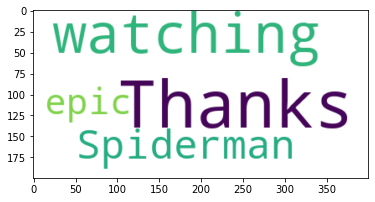

In [88]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt 
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "watch", "br"])
my_cloud =  WordCloud(background_color =  "white", stopwords = my_stopwords).generate("Thanks for watching the movie. The Spiderman is epic.")
plt.imshow(my_cloud,interpolation = "bilinear")

In [90]:
from sklearn.feature_extraction.text import CountVectorizer , ENGLISH_STOP_WORDS
my_stop_words = ENGLISH_STOP_WORDS.union(['film','movie','movies','cinema'])
vect = CountVectorizer(stop_words = my_stop_words)
vect.fit(amazon_data.review)
X = vect.transform(amazon_data.review)
print(X)

  (0, 2625)	1
  (0, 2724)	1
  (0, 3038)	1
  (0, 3259)	1
  (0, 4657)	1
  (0, 5338)	1
  (0, 6976)	1
  (0, 7000)	1
  (0, 11546)	1
  (0, 11806)	2
  (0, 11816)	1
  (0, 11818)	1
  (0, 12489)	1
  (0, 12701)	1
  (0, 13022)	1
  (0, 14154)	1
  (0, 15555)	1
  (0, 16476)	1
  (0, 17836)	1
  (0, 18471)	2
  (0, 18975)	1
  (0, 19551)	1
  (0, 19953)	1
  (0, 20363)	1
  (0, 20901)	2
  :	:
  (9999, 12079)	1
  (9999, 12286)	1
  (9999, 12312)	1
  (9999, 12420)	1
  (9999, 13483)	1
  (9999, 16633)	1
  (9999, 16725)	1
  (9999, 18112)	1
  (9999, 18182)	1
  (9999, 20071)	1
  (9999, 20333)	5
  (9999, 20353)	2
  (9999, 20844)	1
  (9999, 21482)	1
  (9999, 21785)	1
  (9999, 22457)	1
  (9999, 24262)	1
  (9999, 25023)	1
  (9999, 25068)	1
  (9999, 25828)	1
  (9999, 27803)	1
  (9999, 27922)	1
  (9999, 28130)	1
  (9999, 28678)	1
  (9999, 29795)	1


### Word cloud of tweets
Your task in this exercise is to plot a word cloud using a sample of Twitter data, expressing customers' sentiments about airlines. A string text_tweet has been created for you and it contains the messages of a 1000 customers shared on Twitter.

In the first step, your are asked to build the word cloud without removing the stop words, and in the second step to build the same cloud after you have removed the stop words.

Feel free to familiarize yourself with the text_tweet list.

### Instructions 1/2

Import the word cloud function and package.

Create and generate the word cloud, using the text_tweet vector.

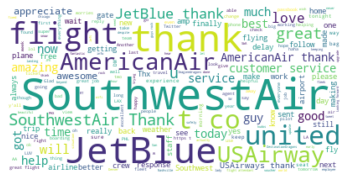

In [91]:
text_tweet =  '@SouthwestAir Another great flight &amp; crew, Las Vegas-Chicago #3397. Thanks! @USAirways thanks. @SouthwestAir got it squared away. Thank you. I had a man on the inside help me out! @JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC @USAirways thanks for giving away my seat. Another fine job! http://t.co/r7ibqr4CYd @USAirways your pple did a great job w the madness however some of your systems need help. I appreciate the hard work &amp; the push to b better @SouthwestAir I got a flight at 11:55am on Thursday but looking for something tomorrow, anything available? @SouthwestAir thanks I think we\'ve got it figured out @SouthwestAir Thanks for the response. Was able to get my situation resolved. Not a fan of Mother Nature today. :) @USAirways @AmericanAir First Class all the way!!💺✈️ Headed to @portlandjetport http://t.co/kDMq0jps02 @SouthwestAir - just talking to customer service @united makes me appreciate you even more!  They could learn so much from you! @SouthwestAir Thank you so much for stepping up your game and making my day after night of elevator music. Much appreciated. @JetBlue Btw, thanks for responding quickly!! @SouthwestAir Sent. Thanks VP! @USAirways ok thank you we were told ground delay due to snow. @JetBlue Gotcha... thanks for the update. I\'m ready to go whenever you are :) Enjoy your evening. @USAirways Will do. I appreciate the response. @SouthwestAir Awwweesssooomee! @SouthwestAir Black History Commercial is really sweet. Well done. @SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank you. @SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip @SouthwestAir thanks for the drink tickets hook up! Can\'t wait for my first international flight with you to NAS! #pumped @SouthwestAir Yeah, we figured it out.  Thanks. @SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set. @USAirways  thank you! Glad to be heading home! Great people at your call center! @USAirways thx 4 replying. After trying 2 get thru many times, &amp; v-mail or people hanging up on, us we talked 2 tech...cont\'d @USAirways HA!  You\'re fun. @SouthwestAir Hey yea I got thru...everything is good now (well, in 7-10 days when the voucher goes through)  Appreciate it! @USAirways flying high thanks! @SouthwestAir thanks for your assistance..you guys ROCK!!💯 @SouthwestAir all good now. Going to make it to Boston on time. I\'m actually on your wifi right now @USAirways Thanks. It would be better from the gate agent at C14 in Charlotte boarding flight 1791. @SouthwestAir Glad it was finally resolved too. Too bad I can\'t get a free voucher to go with mine so I can have a friend travel next time! @JetBlue I would prefer a similar picture but full of E190 tails, but great shot! @USAirways thanks @SouthwestAir much respect! @SouthwestAir Thank you!  #thankful #feelingtheluv @SouthwestAir I got it added thank you! :) @SouthwestAir Great, thank you. Best of luck dealing with this horrible winter. @southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir No worries at all!!! I would rather be safe on the ground than take any chances. Yes! Tomorrow AM if BNA reopens ☺️ @JetBlue Well, thankfully they\'ve got a nice food court here...When will an update be posted? @usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it. @SouthwestAir About time...and just in time for my next flight Thursday. @SouthwestAir Thank you. I know ya\'ll can\'t control the weather. I appreciate ya\'ll working to get my flight rebooked the last two days. @SouthwestAir Thanks. I\'ll keep checking. I\'m trying to book our first Disney World vacation. @USAirways Marsha M. at Myrtle Beach is the greatest! She deserves all the respect and praise there is! #ThankYouForEverything @USAirways thanks to Betty working gate at ILM and lovely gate agents here in CLT helping me get home 2 Phx tonight instead of tomorrow @SouthwestAir El Paso deals....May❤❤❤😍🌏 @SouthwestAir really appreciate the follow up, I always fly with y\'all for a reason! @SouthwestAir Awesome - thanks! Despite Mother Nature\'s best efforts, @SouthwestAir\'s good-humored folks got us home safely in an area heavily affected by winter storms. @SouthwestAir I did. Thank you. @SouthwestAir Thanks for taking care of me Today!  Michele rocked the customer service! Gate 25 HOU @USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it! @JetBlue Worked now, ty @SouthwestAir thank you :-) @SouthwestAir All pieces were found and safely delivered to our home this afternoon. @SouthwestAir no worries. You\'re doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763 @USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai @SouthwestAir no worries. We got thru eventually. I was just curious. Best of luck to you dealing with the weather! @JetBlue wouldn\'t mind paying for the snacks but no $ for tix :-) Great job guys! @JetBlue Thanks for the quick reply! Just wanted to make sure it wasn\'t just my account :) @JetBlue I did see that! Working on picking up a trip or two as we type. @JetBlue what are the chances of actually flying out of Charleston today?? Cold, rainy weather in the south of all places... @USAirways she also appreciated having her very own hashtag! :) #lucycat @JetBlue awesome, thanks! on hold now. @JetBlue flight 117. proud to fly Jet Blue! @JetBlue thanks great recap. I wouldn\'t have been able to sleep!  I was nervous the bad guy was getting away. 😉 @JetBlue great. .@USAirways thanks! “@JetBlue: @jannasaurusrex Thanks for the kind words, Janna! #WeAppreciateYou #TrueBlue” and now I\'M feeling like a boss #jetbluefame @JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks @JetBlue sooo earlier i said i couldnt fly with you for my school trip but now i can! 😏 @USAirways Thank you, busy times. @JetBlue thank you for the information. @JetBlue why are you always so amazing! #jetblue #trueblue http://t.co/iIMTJxcvLG @USAirways thanks :) @JetBlue Thanks. I\'m finding lower fares already on other carriers with direct flights. July 8 - 13. @JetBlue incredible PR team. 👏👏👏👏 @JetBlue Was nice to see your Veterans Advantage Program at the gate on Sunday @ MCO.Keep up the good work at  JetBlue @JetBlue sounds great! Thank you!! :) @eatgregeat WOW~Thx for thinking of us, Greg! Heard #SOBEWFF was amazing! We\'ve heard the same about @JetBlue (ps thx for the info) #TeamNKH @JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:) @JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroom @JetBlue Longing to look into the blue eyes. #firstlove @JetBlue you don\'t need to cut services, charge more and give a better flying experience. That\'s why I use jet blue in the first place @JetBlue glad you like it. Feel free to steal it. @JetBlue your blue helped bring out the color of my eyes. And I promise I didn\'t eat all the free snacks. “@JetBlue: @Ruth_Slobodin Why not? We\'d sure love to see you, Ruth! #JustDoIt #YouKnowYouWantTo ;)” you know me too well 💘 @JetBlue great will do once I land in JFK @USAirways thanks for reaching out to me.  My Gold Div no. 2k424j0. My Flights were changed under Confirmation # DNX58V. @JetBlue here you go... Your napkins pretty much say it all! http://t.co/OxY1Jnpjm3 @USAirways yes and our flight attendant (who is wonderful btw) secured the tray table so it\'s not flailing about. http://t.co/JhXWMuTx4G @JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz @USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now! @USAirways Thank you!!! On our way to get her bag now - thanks to having that number 😊 @JetBlue Thx for the quick response .... yep I tried- but it can\'t find the flight when I Input the Confirmation # @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @JetBlue Wish Everyone felt like you @JetBlue thanks to you customers like me stay loyal. From check in to landing. @SouthwestAir thanks!! We will see what happens!! @JetBlue haha. TY. Do you know what time that lane opens at Logan? @USAirways YOU ARE AMAZING!!! FOLLOW ME BACK, PLEASE!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @JetBlue I like " Follow @JetBlue " @SouthwestAir Karen with customer service was very helpful. Thank you for providing one bright spot in a frustrating situation. @SouthwestAir you guys are awesome... #dontchangeathing #luv @SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me. @SouthwestAir about time! Thank you! @SouthwestAir is having a sale! I\'m delighted! @USAirways You all work hard at making sure things flow smoothly. Keeping positive. @USAirways we are boarding now but have yet to depart.  Thanks for the response. @USAirways I totally understand the weather. Just frustrated. Thanks! @SouthwestAir LUV Ya Too!!!!  I will sing a song for y\'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR @SouthwestAir Thanks a ton! @SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response @USAirways Thx to gate agt John Pascucci for finding us a flight from CLT to PVD after our original one was Cancelled Flightled http://t.co/YiwLhQhZgp @SouthwestAir always when I fly SW. #loyalRRmember @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @USAirways surprisingly quick response time by you and them. Thanks! @SouthwestAir yes. Thank you. Oct 25-oct 31 @USAirways still not in the air for deicing of plane. I\'ll miss connect but customer service was helpful.I\'m hoping to catch the next flight @JetBlue FYI, I\'m onboard #616 comfortably travelling to JFK, seat was no problem as you said. Thanks for making flying more civilized! @SouthwestAir and thanks! @SouthwestAir its all good. flight eventually took off, and landed safely. oh, and I got the free cup o wine. thx @JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j @SouthwestAir nice work on the update! @SouthwestAir thanks do yall expect to be operational tomorrow out of Nashville? @JetBlue sure is 💙 @USAirways thanks so much! @SouthwestAir Beautiful, thanks a ton! @JetBlue after my second call to customer service and the fifth person I talked to, an amazing rep fixed it in about 5 mins! :) #persistence @JetBlue thanks so much! @USAirways thanks!  Can you help remind the agents it\'s ok?  Ps. Heard rumors of a streaming wifi TV/movie service you might be installing @SouthwestAir finally! @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @SouthwestAir  Thank you. @JetBlue That makes two of us! Lol #Blushing @JetBlue Happy Anniversary!! It\'s hard to believe you\'re 15!! You\'re so young! @JetBlue #1680 Super smooth flight and landing. Nicely done. @SouthwestAir Great job!! Looking forward to my next trip being able to use this new feature! @SouthwestAir Great job with the Passbook integration! It’ll really help streamline the commute to San Fran! 😊☕📲✈ .@SouthwestAir you\'ve got a mess here at DTW but your staff is doing great. @SouthwestAir + @twitter  = outstanding customer service!  Thank you! @SouthwestAir aww thanks!! Other than that, love it! @SouthwestAir thank you for your help resolving my problem Shannon ROCKS - even though Rhonda didn\'t !! @SouthwestAir can\'t wait! Thanks for the response!❤️ @SouthwestAir - I just had a great experience with your customer service team. Thank you! #LuvSW A-list @SouthwestAir @ PIT- Gate A1! Big shout out to the lady trying to track him down! @SouthwestAir luckily, the people working the BSO at Chicago Midway have been very attentive and found our bags in Punta Cana. @SouthwestAir awesome. thank you! @USAirways thanks @USAirways - done :) @USAirways thank you. We filled out a claim and hope to have the bags tomorrow. @SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home! @SouthwestAir that\'s why I fly y\'all, that personalized service @SouthwestAir @Imaginedragons @beatsmusic I\'d love to hear them live at @VelourLive @velourlive this saturday! #destinationdragons @USAirways Will do :) @SouthwestAir So far so good! http://t.co/16c9ex79Rk @USAirways please give Tara G a pat on the back and praise.  She was very very helpful.  She is at PHL member lounge @USAirways  thanks I hope I get to my destination @SouthwestAir thx - fingers crossed they are found. Lmfaooo “@JetBlue: Our fleet\'s on fleek. http://t.co/1G9RnmYUQe” @USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday @USAirways will do. Hoping for a voucher for a future flight #Optimistic @SouthwestAir Whoa. Thanks and that\'s what I wanted to hear! Early flight coming up. Thanks for the reply. @SouthwestAir is there a way to know who checked my bag on the curb? She was awesome!!! And want to be sure she gets a high five! @SouthwestAir thank you for handling this for me. Glad Southwest cares about what it\'s flyers think! @SouthwestAir :arrived in San Juan early. Thanks for a great flight. LUV u! @SouthwestAir thanks for the follow up.  I appreciate it. @JetBlue lolol @s_myc88 @JetBlue shows us their sense of humor with these tongue-in-cheek flight etiquette videos: http://t.co/GGuAA1JvDF @SouthwestAir @karajusto OK we will! Thank you!!! @usairways #crew keeping safety top of mind in CLT. http://t.co/a0YoSJHZMc @JetBlue true. Maybe. Wish I had expedited security haha @SouthwestAir @taylormdowns We share that value in common. :) @SouthwestAir JUST GAVE ME TICKETS TO SEE @Imaginedragons  AT @VelourLive ON SATURDAY. I CAN\'T EVEN RIGHT NOW HAHA. THANK YOU!!!! @SouthwestAir once or twice a year. Hard to get vacation time from work sometimes. But love flying with you guys! @SouthwestAir @love_dragonss lol I\'m sorry I\'m just seeing this now but LAUREN OH MY GOD AHHHH Why “@JetBlue: Our fleet\'s on fleek. http://t.co/a7NvbJ8ipx” @SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u! @SouthwestAir thanks for the follow up. So glad to get my bag back. @SouthwestAir love..luv the addition of the passbook option. Power Moves RT @JetBlue: Our fleet\'s on fleek. http://t.co/t9s68korSN Bingo! “@SouthwestAir: Thank you for bringing this to our attention. We\'ll be happy to reach out to Noah so we can make this right. ^MR” @USAirways captain on flight 1712 from PHX-PHL at 3:55 tonight was hilarious. "Greetings from the pointy end of the airplane" haha thanks! @SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223 @SouthwestAir woohoo that just made my day. I looked and just couldn\'t find that, thank you! @SouthwestAir One heck of an airline http://t.co/CyoOnZfTdC @AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership? @AmericanAir Great, thanks. Followed. @AmericanAir This is exactly why ill be flying AA from @Dulles_Airport to Dallas! Only airline I trust! @AmericanAir got another flight. Thanks you @SouthwestAir y\'all the real MVP with these prices... @SouthwestAir Thx Ops Agt Rich Westagard n Flight Att. Nancy @ DEN Airport.Held flight 1027 n even saved seat 4 Bus Select #CustomersFirst! @SouthwestAir Thank you for having flights going out of Nashville! You guys Rock! #DisneyPrincessHalfMarathon #girlsweekend #bffs @AmericanAir I don\'t think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃 @SouthwestAir DM sent! Thanks so much for responding! Your response was so timely, I missed it! @AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick. @SouthwestAir I love you guys! Had to take a few other airlines this week...makes me love and appreciate y\'all so much more! #onlywaytofly Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E I appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB @AmericanAir yes yes yes,so glad to be headed home! @AmericanAir thanks!! @AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx @SouthwestAir the new logo is going to look amazing on the airplanes “@JetBlue: Our fleet\'s on fleek. http://t.co/3kVkd8yRxa” + lol wow @SouthwestAir love bridesmaid dancing Can\'t wait for you to fly into puerto Vallarta and kick united ass! @AmericanAir thanks @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊 "LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet\'s on fleek. http://t.co/LYcARlTFHl” @JetBlue wow, keeping up with the times... @SouthwestAir filing it now. Thank you for your response. @SouthwestAir thanks so much for making my night 😀 cannot wait for my trip next week! http://t.co/NbZ45jCd1r @SouthwestAir thank u for not leaving me \n@me nice job running thru the airport to catch your connecting flight @southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0 @SouthwestAir Thanks for replying, I sen\'t my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day! @SouthwestAir, I really appreciate you all\'s #BHM commercial that aired today during @BET\'s #BookofNegroes @USAirways — I had exceptional service on flight #403 from IND to PHX!! @AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today. @SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK @SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim @SouthwestAir Fantastic! Thank you! I always look forward to JB RT @JetBlue: @bostongarden :) Looking forward to welcoming you onboard! 💙 Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks! @AmericanAir thank you! @JetBlue toss this ticket...it\'s great PR and I\'m sure every college student following me will be willing to rock out wit too 👀👀 @SouthwestAir can i get tiks for #DestinationDragons omg id love to! Plz 😱❤️im dying @southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH @SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers? @SouthwestAir thank you kindly. @USAirways Fabulous - thank you so much! Looking forward to taking to the skies with you! :) @SouthwestAir THANK YOU for finally making your boarding passes work with passbook @USAirways thanks! @SouthwestAir de-icing is important! @JetBlue Thanks so much for talking to me! The article about #Twitter chats came out great! http://t.co/rKorHvR9z1 #contentmarketing @USAirways YOU ARE THE BEST AIRWAYS! Follow me please!!!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉 @SouthwestAir just did last night. Thanks for following up. :) @SouthwestAir thanks for getting me back to Nashville. Big thanks to the pilots on the 6:15 out of Baltimore. Flying in snow landing on ice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE AND I FOLLOW YOU BACK;)🙏🙏🙏✌️😉) @SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint! @SouthwestAir @DeltaPoints hey at least you guys are honest with your customers unlike @Delta @SouthwestAir Thanks for the info! Have a good day. @USAirways Sending thanks to employee Freddie in PHL Admiral Club A East for allowing me to give a day pass to my sibling stuck there today. @SouthwestAir Landed in Nashville! Thanks for taking care of us! http://t.co/RYXbPLgMnK @SouthwestAir Thank you for your time! @SouthwestAir Thank you! @USAirways that\'s why u guys are my #1 choice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE 🙏🙏🙏😢😢😢🙏🙏🙏 @USAirways Thank you. And thanks for being so accommodating. @JetBlue: So excited to hear about your move towards international travel from Long Beach Airport! @SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏 @SouthwestAir thanks for your excellent response time and assistance! All set :) @SouthwestAir - total win!! Happy 7th bday on intercom, chocoLate Flight kisses, and a chance to hand out snacks.Thank you. http://t.co/NKloZcNtto @SouthwestAir big thanks to your team. family emerg, same day ticket, experience was excellent. 1st time flying with yall, not my last! @SouthwestAir has the best customer service! @USAirways with the weather mess in the South, I missed my connection in CLT. Impressed though with the Cust Serv phone reps today. @southwestair Flight 4146 Phi to Den was staffed by a great crew. #freecomedyshow #newlifetimecustomer So relieved I\'m flying @JetBlue after listening to everyone at the neighboring gate bitch about Spirit. My airline\'s better than yours. “@JetBlue: Our fleet\'s on fleek. http://t.co/g12sn5qsqZ”- no... Yall better than this @USAirways thanks. 😒 @SouthwestAir hot stewardess flipped me off @USAirways Frustrating days!No flights home, changed airlines. Thank you PHL USAirway employees &amp; @united for help getting me back to IAH. @SouthwestAir Once again, I was able to change my flight without any fees... oh and the two free checked bags.  Best airline ever. @SouthwestAir you are the #Official airlines of #DivadaPouch aka #ThePoopQueen http://t.co/XXY2d2iMnP @SouthwestAir @JohnWayneAir Thank you both very much!! @USAirways Flight # 604. Thanks. @JetBlue We had 2 great flights into and out of the Bahamas, even during the bad weather in the northeast, thanks for the great service!!! @SouthwestAir neveind, it\'s been found and on its way. Thanks for making the process so painless @USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! FOLLOW ME BACK, PLEASE 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir A wonderfully nice agent in Austin helped us out. Wish I remembered her name to give proper kudos. @SouthwestAir Got it covered. Thanks! @SouthwestAir Awesome!!! Sending now. @USAirways nice touch with using my first name.  Very intimate.  I\'ll be filing a claim soon to be reimbursed. Have a us airways day! @USAirways on Sunday! Can\'t wait! See you then @JetBlue loved the service from the staff at Newark today. \n\nGood service goes along way.\n\nI appreciate your preciation  \n\nNj ✈️Tampa \n\n🔵🔵🔵 @USAirways Thank you so much its been a very stressful day “@SouthwestAir: @kirkwoodtiger Hmmm... how does the Caribbean sound? https://t.co/AAY5avg99b ^LD” WARM THANKS! @USAirways landed safely everything worked out. @southwestair#SWADiversity We are ready to be inspired! http://t.co/S3EsW5AgUm @usairways 4 flights in 48hrs &amp; I\'ve had the same flight attendant for 3 of those flights. Freaky coincidence! Plus side she\'s great. :) @USAirways Absolutely!! The staff was amazing!! @USAirways Haha - that will indeed be a great day! @SouthwestAir allows you to change a flight once for no fee, yay! I will always book flights with them. @AmericanAir changes you $200 @SouthwestAir I\'m really craving your pretzels, please send me some. @SouthwestAir just added #passbook support to their iOS application! Finally, I get to add them to my collection. http://t.co/lEdNoCdQee @USAirways thank you! I tried that and they said they didn\'t have it. Anywhere else to try? @USAirways thank you for fixing my 5 hour delay. @USAirways customer service at its finest Don\'t show these to Larry Fedora. RT @JetBlue: Our fleet\'s on fleek. http://t.co/qqlzk2jkzR @southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir - Apology accepted! #customerserviceWIN #itravelalot http://t.co/z5znfwkKWP @SouthwestAir LOVE your TV ad with the girl dancing. Makes me laugh every time, AND now I want to take a trip! :-) @SouthwestAir Yes! I did and the bags came straight to my hotel. Thank you ...you guys rock! @SouthwestAir thank you!!! @USAirways shout out to the pilots and FC attendant(Eliz) of US 673. Super strong crosswinds during landing. Eliz did a super job throughout @SouthwestAir pleasantly surprised to be boarding my flight on time this morning at @Fly_Nashville. Good job! @USAirways ice cream up front! Solid @SouthwestAir OH MY GOSH SERIOUSLY?! you just made my day, week, year!!! No one will appreciate this more than me!!! @USAirways after missing my flight and reFlight Booking Problems 2x, I just walked onto another flight and my phone was still on the seat!! @USAirways on time today and from PHL! Nice work! #ThereIsAFirstForEverything @USAirways thanks Travis at PHL A East checkin for knowing baggage policies. Skis &amp; boots count as 1. Teach your mgr who didn\'t know @USAirways finally rectified my flight situation! Thanks again @USAirways how about a drink voucher for the next flight?? #winkwink @SouthwestAir Thank you thank you thank you @SouthwestAir @love_dragonss oh my god LAUREN OH MY GOD OH MY GOD @SouthwestAir @love_dragonss holy fuckinf shit @SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER @JetBlue you guys operate a world class company and for that I thank you @SouthwestAir you\'re the best @SouthwestAir @love_dragonss LAUREN OMG IM DEAD IM SO SO HAPPY FOR YOU YES YES @SouthwestAir @love_dragonss LAUREN IM SCREAMING @SouthwestAir @love_dragonss oh my gosh @USAirways right on. Up. Up &amp; away ✈️🌞 @JetBlue Thank you guys! Brilliant customer service @USAirways FA attendant on 4553 PHL to PWM tonight was fab!  An asset to your team.  From 1F. Have a great night team! @SouthwestAir had a great LA flight with Clarence and Frank! Those 2 guys are a hoot! 😜😂 thanks @AmericanAir thanks, I\'ll look forward to the response. @united New Apple crâpe, amazing! Live from UA1207. Really nice crew too.  #AmericanAir has biscuits, UA needs them 2 http://t.co/gZ9GqDT7Jj @JetBlue thanks for the info... Figured that was the case. Hopefully my new hashtag will change that ;) #ABCLetJetBlueStreamFeed @united Thank you for the new Club at O\'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable. @AmericanAir thank you, truly appreciate the help, just sent a DM @JetBlue saved the day:) @Expedia lost a costumer #jetblue #makingthingseasy #feelbetter @united I appreciate the follow up. @united @jsumiyasu I am thankful to the  United ground staff who put me in the last seat on the last flight out. Home Late Flight is still home! @united no worries about the tweets. We all should do what we can to make sure we, as in your tag line, "Fly the Friendly Skies." @united @FlyANA_official pleasantly surprised to find ANA has made major upgrades on their transpacific route in flights, planes and service @AmericanAir Thank you so much. @JetBlue yes! Terra blue chips were my favorite. :) @JetBlue I DM\'d my confirmation code... Thanks again for your help! Mommy, daddy, and kids appreciate it! @united Brandi Zabsonre in Denver deserves a raise for bringing delight into a terrible travel situation. big ups http://t.co/TK3aOpdtSQ Cool! "@JetBlue: @hgeronemus We are 60% there and anticipate completing installation on all our A320\'s this year. http://t.co/sGckBopATA” @JetBlue Love you guys sooooooo much. Ridiculously appreciated! A+ service! @united thankful for great service in Newark. Seats fixed and I was seated with my daughter! Fab landing in Fort Myers! @AmericanAir #AATeam thanks for working in very rigorous weather conditions for all @JetBlue you are officially my favorite, thank you for the wonderful service at JFK @SouthwestAir thank you so much completely made things right! @JetBlue thanks!! @SouthwestAir round-trip tickets just arrived for our auction at the Post-Masters Invitational! Thanks Southwest! http://t.co/mRfBjtePef @SouthwestAir Thanks so much! @SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!! @JetBlue thanks! I\'ll do it. @JetBlue @FerrisSalameh Love JetBlue\'s speedy Twitter customer service. @SouthwestAir  I USED to always fly Southwest. @SouthwestAir weather bc of system outage. Hopefully everything goes smoothly now. Thank you for follow up @JetBlue thanks! @SouthwestAir I managed to get sorted out over the phone. Good luck dealing with the snow in Texas! @JetBlue thank you so much for your effort @AmericanAir Delaney and Shawn at DFW showed exceptional customer service today. Will happily choose AA whenever possible now! Thank you! @SouthwestAir never mind, I moved my flight to tomorrow. Thanks for the help! @JetBlue thanks for letting us know. Hoping for no more delays! @SouthwestAir  thanks Southwest for saving our trip. my sweetheart isn\'t going to miss seeing #AltonBrownLive thanks to y\'all! #SOhappy @USAirways thank you @AmericanAir thanks... I finally got through this afternoon.  :) @SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please. @SouthwestAir love them! Always get the best deals! @United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences. @JetBlue Airways Corporation (NASDAQ:JBLU) Reaches on New High Range ... - StreetWise Report http://t.co/C7tpdKqULM @united stay warm - I will be passing through Chicago next week @AmericanAir Well, you guys are totally kicking a million pounds of ass. Bar none, the best SM team in the airline industry in my opinion. @JetBlue Please come to Indianapolis! @united thank you! I wish the lady in Little Rock had told me that in the morning when I asked her @JetBlue okay thanks. Hope to be flying with you guys soon! @JetBlue he loved the #natural #beefjerky snacks😉 @JetBlue thanks for your reply. It was flight 1572. @JetBlue who is he I must send a note!!! Too good for words! @united You might be dealing with frustrated passenegers. hope you all have a great day :) thank you very much for an amazing airline :) @JetBlue - loving Capt Joe on our flight from BOS to SFO #633. This should be fun! @united JT thanks for your help I’ll complete the form once we are back home @AmericanAir thanks @JetBlue It was fabulous! Very pleased. @AmericanAir THANK YOU!!! 👍👍👍👍👍 @JetBlue u the real MVP http://t.co/jWL26G6lRw @JetBlue No worries. Time flew in the terminal and now we\'re taking off. Thanks again! @united Thanks! @united Elizabeth at Washington Dulles just hooked me up with a new connecting flight at my gate! I\'m super pleased! @united Thank you for the speedy response! I figured it may be something of that nature. You guys and your "fine print," haha @united holy high speed internet batman!  Speeds at United Club at IAD are insanely fast!  Thanks @AmericanAir Thank you!!!! I will be there to pick her up on time. @JetBlue - looking forward to it when we finally take off. @JetBlue thanks... @united doing a good thing, holding flight for a few for 11 peeps on Late Flight connecting flight. We\'ll still make destination on time @AmericanAir thank you for the assistance @united on a good note, the 2 employees I encountered @ Newark were fabulous. I was very Late Flight for my connecting flight and they got me on!!! @united Thanks, ^KP. Please also mention the Quiche breakfast and Tandoori chicken dinner entrees and accompaniments are truly First Class. @USAirways connection made. Thanks again this week. #daddyshome @united looks like I\'m settled in to where I\'m going.  Thx. Is expiring the @united offer to buy or transfer #United #MileagePlus miles with discount? Many offers during a year http://t.co/6tz6imqZlG @AmericanAir yes, it says it should be deliver within 6 hours after pick up line. @united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW @AmericanAir thanks. Delivery status?? @united Sure did! Only waited about 15min. Yay! @JetBlue thanks! @USAirways yes I did thank you! They did a great job turning the flight in jan ! @united thank you! 😊 @AmericanAir Hey Becky Piela at the Orange County airport has been really kind and helpful with rescheduling our flight! @united done just now, thanks. @united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon. @AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN @SouthwestAir tv stream means I get to spend my flight watching 1999 and 2011 Women\'s World Cup Finals. #throwback #bestflightever @JetBlue thank you @SouthwestAir @heavenlychc9 I\'d at least enjoy a free cocktail...or two. @SouthwestAir beyond ready @SouthwestAir thanks for the great customer service today! 👍👌 @SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest @JetBlue ok thank you for the quick response JetBlue still the best comp @JetBlue im in a session presented by one of your beloved travelers, @paulgordonbrown,I see why you love him so much http://t.co/vv8cFyhKVb @SouthwestAir thankyou :))❤️ @SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking @SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff! @JetBlue oh definitely. I kind of only fly JetBlue. @JetBlue thanks for getting me to Orlando early #happiness @SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be Ourguest @SouthwestAir Thanks for two smooth, safe and fast flights! #Boston #Houston #LUVSWA http://t.co/elhxUV0Uj1 @SouthwestAir thanks! @SouthwestAir great day in the air. http://t.co/YNc2ZUt4zz @SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn\'t love texting 40,000 feet in the air :D @USAirways - Check-in staff at PHX are awesome! Great traffic control for general boarding. @SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child\'s peanut allergy but u guys didn\'t. Thanks! 👍😊 @AmericanAir no kidding! Gonna take some beating on the apron... And there are some good lookin\' planes out there! @USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly. @SouthwestAir is my favorite airlines. I\'ve never had issues with them. Plus there crew is entertaining. @SouthwestAir your flight attendants are really funny!! The sass is giving me life!!! 😂 @AmericanAir thanks for following up- it finally worked!! Fingers crossed the new flight works. @JetBlue Kudos to JetBlue social media team for jumping in an helping me out during the last snow storm while web site was down..Thanks!! @AmericanAir Was not on board you today just watched report unfold on Twitter but still am very proud! @JetBlue thanks so much for your condolences and quick response. It is very much appreciated @SouthwestAir thanks for the quick response. Should I call daily it wait the 5 days. @JetBlue Thank you Alicia!  #ExceptionalService @SouthwestAir thank you. Great customer service so far. Accidents happen I understand. Hopefully everything works out. @SouthwestAir 2/22-MDW 2 SAN flt 1687 attendant Melissa was awesome! Fast, smiling, great. After weather Cancelled Flight day b4, it was welcome @SouthwestAir The Fact That U See Black History Month 12 Months A Year Is Honorable! We WILL BE An Economic Base For Corp. Like U In Future! @SouthwestAir eyes next steps for improving #inflight #Wifi - Runway Girl http://t.co/h46HT1Oz40 @SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :) @SouthwestAir oh no worries. Just have never seen that before until today. I mean…it is a great card 😀 @JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown. @JetBlue mission accomplished: gave @paulgordonbrown  a hug http://t.co/LT1pYKfvRq @AmericanAir Thank you for the response, we got it resolved at the counter. @SouthwestAir thank you :) @SouthwestAir It\'s all good. Thanks! @SouthwestAir following. Thank you. @SouthwestAir Flight 1700. (PHX TO LAX) Wheels stop.  Glad to be home!  Thanks to the professionals both up front and in the cabin!!! @AmericanAir thank you. They are processing my refund. @SouthwestAir 👏👏👏 on that Late Flightst ad. Makes me happy to be flying you in a few days. #BETHonors @SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!! @SouthwestAir @intuit @jhamilton2007 4 moms, 4 careers, 1 day trip to LA. #intuitlife #leanin http://t.co/2qJbCv5jzq" #southwestairlines @SouthwestAir ok thank you  i hope  so too @SouthwestAir Customer Centricity is knowing people #ANAMarketers @JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :) @JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek @JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket @JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood @SouthwestAir strives to be \'Customer Centric\' in everything they do - communications, advertising, customer journey, etc. #ANAmarketers @SouthwestAir Thanks! Sent a DM to you. Let me know if oyu need any additional information. @JetBlue word thanks @USAirways Yes thank you. Appreciate u checking... @SouthwestAir Thx for your quick response and action! bf will make good use of the voucher #satisfied #happycustomer @JetBlue 162, SMF to JFK! @AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks! @SouthwestAir "Airport snow removal method #22.."\nKeep up the good work folks, this is where Cessna\'s become 747\'s! http://t.co/7poFSXOjSY @JetBlue of course !!!! @SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY @USAirways I\'m enjoying my flights so far! You\'re doing a great job. Today\'s been tough, so thanks for making my flights comfortable. @JetBlue Thanks for the complimentary upgrade to first.  You are the best! @SouthwestAir is the best airline hands down. Amazing customer service, bags free and affordable flights. #happycamper @SouthwestAir thanks to Ella-Mae at LAS counter for going above and beyond to help us get back to ABQ after our flight was Cancelled Flightled! @AmericanAir Thanks to AA for the upgrade today and getting me on a new flight after my first one was Cancelled Flightled! @SouthwestAir Looking forward to flying once again with #SWA on Friday! The #LUV airline. #DTW #MDW #TUS @southwestair cool shot of the moon and one of your fleet http://t.co/kl9BAiMES6 @SouthwestAir loving the new planes and the lighting, only wish windows were larger. http://t.co/h44uJ63CJG @SouthwestAir can anyone help me upgrade to buisness select !? Cant seem to get hail of the right area at all .. I know you guys are good @SouthwestAir - We left iPad in a seat pocket.  Filed lost item report. Received it exactly 1 week Late Flightr.  Is that a record?  #unbelievable @USAirways Shavon at customer service desk in Charlotte was fantastic! So helpful and smiling evn after what sounds like long day.Reward her @AmericanAir first ride on new 737-800 with new interior and in seat video. Nice improvement! #Newplanesmell http://t.co/dJJjN9sLHT @SouthwestAir had a great flight to and from Cabo last week with my family #smoothflight #frequentflyer @AmericanAir No worries at all. Y’all have a good one!! @JetBlue Even though this flight #226 didn\'t have much needed hot beverages 4 us NY-ers, the landing was super smooth 👍👍 😊 #happytweet @SouthwestAir bumped me to preboard on both flights (because I\'m fat?) Whatever the reason, thanks! @SouthwestAir Thanks to your team for dealing with Flight 1700 to Houston. @SouthwestAir Thank you for the tip! @JetBlue thanks for getting me to Boston early for @TuftsEnergyConf "Breaking Barriers To a Clean Energy Future" @JetBlue Thanks! @SouthwestAir has the smoooothest flight attendants. #SouthwestSmoothie http://t.co/Vr9k180LaI @SouthwestAir Thank you for taking good care of people with ALS! http://t.co/m1yyWAFkFI @KevinSwan_ @ALSTDI @A_Life_Story_ @JetBlue got it. Thanks Thank U 😘 “@JetBlue: @ItsLaLoca But of course! Safety is always 1st!  We\'ll make sure to handle her with CARE and LOVE!  :)” @united thanks! :) @AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane That would be great! I never thought I\'d be the sort who\'d be into them, but it really makes the flying experience more bearable @JetBlue @united Will have to try standby in Denver tonight or will have to Cancelled Flight father son trip till next year. Thx for trying. @JetBlue thanks to the gent on the phone who fixed my BOS-MCO flight and the fee waiver! A320 now :) #flyfi ! I forget her name :( @united they are all -pilots, FA and ground personnel doing a great job. Weather is to blame... Who do I talk to about that :) .@AmericanAir @TyWinter it\'s really the small things--the details--that make an excellent experience or a really irritating one. @AmericanAir Thanks! Great stuff! I can only imagine how jammed everything is. @united hey awesome!  Thanks for the reply, will be filling the form out! @AmericanAir Thanks! Hope I don\'t look like a complainer, I\'ve written of good experiences w/you in the past and am making do in terminal 5 :) @JetBlue @united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot! @united #1007 Houston-Bogota boarding again, safety first, it seems the mechanics fixed the problem faster, good energy to fly home/family @united Honestly, I stopped trying to report things via website. Now I just laugh. Flights work. Miles accrue. I\'m sure it\'s just cosmetic. @USAirways Got it, thanks! @united @parryaftab done thnx @JetBlue Success! Good work JetBlue team @JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav @JetBlue beautiful ride. Thanks again:) @AmericanAir Yay, thanks! Appreciate the help, I know it\'s NUTS right now with the cold and ice! @AmericanAir F-A-N-T-A-S-T-I-C!! thanks again for coming thru with great customer service! @united thanks for the re-upgrade to 1st class. It may be a 45 min flight, but it is appreciated. @united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough @united thank you! Love united!! Have 4 flights today! @united I am blown away by stellar #custserv !! Thank you &lt;3 http://t.co/JOrEScfb4x @united Boeing 777 Star Alliance short finals @Heathrowairport 27L on an amazing winters morning #777 #Avgeek http://t.co/owMaXOyEhZ @AmericanAir will award me 50,000 air miles!!! Yes I am going to take a vacation! \n#thanksamericanairlines @JetBlue gr8 #Mint crew on #flight 123 to #LAX they\'re #Mintalicious #TrueBlueLove #ShelleyandMarcRock #travel #air @USAirways Just spoke with a representative. Moved my flight earlier. Thank you so much for the follow up. @AmericanAir sure, thank you! @JetBlue Thanks for offering this service, guys! http://t.co/xDjzkC34GB @united all good! Next flight was a little delayed so it all worked 👍 @JetBlue what can I say, I\'m #LostinLove w/our #brandmance https://t.co/Bzwgp7aDVE #wemosaictogether #Mint #Love @united sweet, follow back and I\'ll get the dm off @united Thank you Margo at Houston\'s Bush Intercontinental for getting me home earlier. @united Thanks - it\'s very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates. @united thank you! @JetBlue you guys rock!! http://t.co/LA397zaoAY @united can I just go ahead and live in your premium cabins? I\'m in heaven now en route to LHR @united Fantastic job by your people today on ua22 from Dublin. A jam packed plane but the crew was wonderful!! @united Just did, thanks for checking! :) @united well it IS John Hughes\' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well. @united thank you for getting our daughter home when @americanair Cancelled Flightled all their flights to Nashville @united great. Looking forward to your response to my DM then @united it\'s kinda funny. No worries. @united okay - thanks for your help, JT! I appreciate your time! @United is the best way to re-unite me with my one true love, shopping in USA\'s fashion capital #NewYork #unitedVUSA http://t.co/rBn7StUij1 @united thanks @united Okay, thank you for your help :) @JetBlue PDX to JFK was suuuuper HOT. @united I forgot that Intl flights out of LAX don\'t go from Intl Terminal! Easiest re-check in ever! woo! @AmericanAir thanks! a response is better than nothing at all {ahem, @USAirways} @AmericanAir those were snacks we left on purpose for your team. :) for being so helpful this morning at the desk and on the phone! @USAirways a big thanks to the gate agent flt5127..keeping us informed of the delay#greatcustomerservice @united yes, Thx! At 10:35 (landed at 9:20). @united flight to RSW tonight -me &amp;  twin 3 year olds. A pilot who was in row by me stayed to help me get the boys &amp; bags off. Lifesaver!! @united did I win :) @JetBlue Love you, bae. #JetBae @united please give special thanks to Aaron in Tampa office for helping me for literally two hours! He\'s amazing. Mission accomplished! @JetBlue You definitely will! @JetBlue you don\'t remember our date Monday night back to NYC? #heartbroken @united OMG THANK U😻😻😻 @united @staralliance was there few weeks ago AWESOME,bright vibrant, and NO habitrails @AmericanAir it\'s always nice coming home but I wish you\'d fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat @united no worries - after everyone boarded, the cushions were brought in. Took a while, but they made it here. @JetBlue Really!? That\'s good to hear! Thanks for the update @walls29 We may make that business meeting after all. @united \nI will admit, you\'ve been rather good to me over the years.\nYou\'ve still got me hooked.\n(for now!)\nPeace. @united thnx @united landing in anchorage, then on our way to fairbanks! http://t.co/FjkvQMbmaS @JetBlue perfect! Probably need some coffee to stay awake during the night ;) Then you better #HoldOn - #EverythingsGonnaBeAlright @jetblue 4 our #brandloveaffair https://t.co/64kN6GEEP8 #TrueBlueLove #travel #business @AmericanAir Thank you. @JetBlue haha no need to apologize 😁 I\'ll be Flight Booking Problems sooner than Late Flightr. I love JetBlue @united Your staff, both on deck and in the cabin on UA768 SFO -&gt; BOS were exceptional today. Please tell them well done :) @united you have the nicest gate attendant at Newark airport gate 101 right now. Multiple delays and she is still pleasant with everyone. @united I was protected on that flight by gate agent Kerry at LAS. She also did an excellent job getting me to my destination today. Thanks! @united is officially my favorite airline. They have created magic for me all day!!! #friendlyskies #careyon @USAirways ok. Thank you @united Thanks, I will! @JetBlue can\'t wait! I\'ll be the one who can\'t contain herself. 😄 @united yes #LHRT2 lounge is fantastic, if only the US ones could be remotely similar! @united Very good flight, thank you! @JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend\'s wedding #greatservice @AmericanAir me too. Despite the chaos, I\'m still grateful for a flight home ✈️ @united we had a wonderful flight attendant named Leah that was with us from lga to den, then den to anchorage! @JetBlue Oh that totally looks on par with @AmericanAir\'s Admirals Club; any way you can slide us a couple passes? ;) @JetBlue Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more! @AmericanAir thanks..... @united our flight attendant @superben was super helpful in finding a bag we left on a flight today. Excellent customer service. Name fits. @united Give Cyndi &amp; Troy each a gold star. @united be  "Chicago\'s hometown airline" care about your neighbors #SaveTheDiagonals #FlyQuiet #ORDNoise @JetBlue I\'ll see you on board again soon! @AmericanAir thx, just sent the DM Cc @DadBoner  #boldflavors “@united: We’re bringing Bourbon St. to 35,000 ft. with bold flavors, fresh ingredients and more dining options" @JetBlue heading to Buffalo... trading the cold in Boston for colder in Buffalo... Maybe the Caribbean next time? @USAirways Kudos to Robin at @PHXSkyHarbor Lost/Found for reuniting me w/ my iPad. She was delightful to work with! @united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you! @united Sivi Stewart at Lax was fantastic tonight helping to find a lost item for us at the airport.  Much thanks! @JetBlue Of course U know I would like 2 lay you down in a #BedofRoses as long as they\'re #mint colored! https://t.co/3QYEzHjGsb #brandmance @AmericanAir Kudos to the crew of Flt 167 today. Specially to Carlton. Loved your new 767-300. Keep up the good work AA! @united big up the pilot of 644 for turning 1hr on the tarmac to just a 20min delayed arrival @united The only thing you fella have done right today is get me to the pacific time zone. @united That made me so mad, but then I called the bag number, and that person was helpful and told me where the bag really was. (2/2) @united :take note of this great example of @JetBlue actually making good for an extremely inconvenient situation. http://t.co/t3Gnk2N7LD @AmericanAir Thank you. It\'s much appreciated. We have been on the plane for 90 min now at the gate. @USAirways experience exceptional service from Cherry at #DenverAirport.  #GreatService. #professionalism @JetBlue @AmericanAir ah ha! I misread the end date as being 2014 not 2015. Thanks for clarifying :) @united and they were traveling as guests of a mileage plus member using that members miles. Great customer service. @AmericanAir Let\'s all have a extraordinary week and make it a year to remember #GoingForGreat 2015 thanks so much American Airlines!!! @JetBlue Thank you very much! @USAirways you can thank supervisor Jeanine and her coworkers for the excellent customer service they provided @united ooh thanks! @AmericanAir great job and great service in and out of SDF this weekend during the winter storm. @united She met me from customer service at the arrival of flight UA3787 PVD-IAD. Thanks, you guys have really handled this storm! @JetBlue I will. Thank you! @AmericanAir welcome anyone who works in those conditions deserves a thank you even though I am other side of #Atlantic lol xx @united amazing flying over 25,000 miles on #UnitedAirlines &amp; alliance last year; still got jilted out of status! #moneyelsewhere This is so smart it makes me angry MT @JetBlue: We’ve partnered with @WSJ to bring you free digital access onboard! http://t.co/0LiwEcAsOe @united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job @united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!! @AmericanAir yes I have. Thanks @united - I think she was having a rough moment w/ a bad passenger from an earlier flight. Things got considerably better. Thanks! @USAirways me too! @AmericanAir i got a new reservation for tomorrow. Thanks! @United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY @AmericanAir $90 dollar RT ticket to Chicago? Yes, Please! @JetBlue Thanks for the reminder of a few older flights I\'d taken and the easy access to add points to my new JB account! Awesome service. @AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house? @JetBlue messaged you, thanks @united received my bag. I appreciate taking care of the matter and following up! @JetBlue OOH! Good one! Speaking of #MiAmore - Just know that #IAdore https://t.co/fWZClBvuG4 Loving #LoveSongFriday @united Great, thank you! @JetBlue I can\'t wait to hear back from you regarding the internship opportunity! 😊 @united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks @united Thanks to supervisor Miriam who provided me with great customer service. #finally @JetBlue Thanks for the $100 credit because of the 4hr delay. I can tell customer service means a lot to YOU #Thankful @AmericanAir My pleasure, next AA flight - this Wednesday to Milan, Italy for @MIDOExhibition -- See you then! :) @AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair @JetBlue thank you for always have the most amazing customer service! Bring on The Disney Princess Half Marathon @united no worries Your customer service gets a bad wrap but just spoke w agent who saved me huge amounts of time &amp; apologized for yesterday @united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS @united thank you. There was one here a few months ago, but none now. Weird you don\'t have a club in one of the busiest airports in the US. @JetBlue I definitely will. Thanks! @AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you! @JetBlue I\'m #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW @united it\'s amazing really. @USAirways hey guys just want to say I had the best flight ever! Thank you so much. I fell asleep and actually had a wet dream. @united Thanks for explanation. It seems like an odd incentive structure, tho, because it dramatically diminishes the value of the certs. @AmericanAir thanks for keeping us safe @JetBlue sent :-) curious to see what kind of comp we get. @USAirways but don\'t worry! They found a hotel, it\'s only 45min away. I got there around 11:30pm, no problem. @united Club in Denver is dope 👌 @united you guys have such big hearts.. keep up the good work @AmericanAir I love very much your planes, can you please follow me back? It\'s an amazing bussines! @JetBlue i love this song &lt;3 thanks @JetBlue @united You delayed a connection for customer service today now I\'ll be able to pay my final respects to a dear family member. Thank you :) @AmericanAir SFO. Natt (the agent who helped me) really did an awesome job. @JetBlue currently dancing in the terminal. love Stevie! @AmericanAir thanks! @AmericanAir well Done all of you xx @AmericanAir All of the nicest people in the world work at Admiral\'s clubs. Gladys in San Juan es mi Amiga @AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info. chair #selfie "@JetBlue: @StacyCrossB6 @PHLAirport @SaharaSams  Everyone looks #FLAWLESS ;) We\'re so PROUD of our PHL crew! #BlueHeros” @AmericanAir My father loved working for you as well as PanAm @JetBlue @WSJ #JETBLUE treated me right as a #disabledtraveler thanks for a no hassle flight to @jamaica @united cool, thanks. @AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out! @JetBlue flight booked! Heading out to California with the @WikiPearl team for  @NatProdExpo on March 6-8! Can\'t wait! #ExpoWest @united sorry to hear outsourcing plan. Boise is best staff/cust service in the country. #boise @JetBlue totally would have.... but the outside view was even more camera ready haha #EvenMoreSpace #EvenMoreView http://t.co/dXuX6DBfd3 @JetBlue thank you for being jetblue and not jetgreen or jetred. blue is my favorite color! and jet blue makes it better :) @JetBlue thanks for replying-I feel a little better we\'ll see how it goes ☺️✈️ @JetBlue thank you! I\'m excited to fly with you for the first time. @SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see! @SouthwestAir Great flight yesterday from MSY to AUS!! Thank you for such great safety,service and beautiful skies!! http://t.co/X1EqYAHfvZ @SouthwestAir I\'ve DM\'d you. Thanks! @SouthwestAir FINALLY!  A Passbook option for the SWA App. Thank you!!!!! @JetBlue 😭😭😭😭 yall are really better then American Airlines though. What can I say other than when it comes to my #BrandLoveAffair w/ @jetblue ur my #soulandinspiration https://t.co/IGkoGyWksr #umosaicmecrazy @JetBlue Great service from PBI to HPN! Thanks. @JetBlue done, thank you! @SouthwestAir Make the world a better place: Visit an elderly relative. @SouthwestAir @AmericanAir y\'all are better then @united @SouthwestAir Although the wait was long due to weather r/scheduling, a phone call and super rep solved the issue! Thank you!! @SouthwestAir @AARP #tfw1 Appreciate the tweet back - It was unexpected. @SouthwestAir I will say that your customer service has consistently been the very best!!! @SouthwestAir last week I flew from DAL to LAX. You got us in almost an hour early. Thank You. @JetBlue  FLL to MDE, great flight, great customer service, THANKS! 2 mths waiting  @AmericanAir  to speak to a human at customer service @SouthwestAir \n\nJust realized I had the wrong departure date. Thanks for making changes easy! @SouthwestAir was in a line a mile long at sky harbor this morning. Your staff was courteous and expeditious.  Thank you. \n#onechildfourbags @JetBlue okay thank you! I\'ll check with them again! @JetBlue they miraculously fixed the plane #kudos to shoe ever it was “@JetBlue: @sylvie75015 Good morning, Sylvie! Have a great flight! #yourock” &gt; Thank you #JetBlue! @mxo42 @henrikwagner73 #JetBlueRocks @jetblue always #mosaicmecrazy #sunrise #bestairline #nofilterneeded &amp; how can you not love #FlyFi… http://t.co/NY6CS7jRuV @SouthwestAir Offers Atlanta Unprecedented Perk http://t.co/nustgpElSf http://t.co/Be0B4K1Xbt @USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN. @SouthwestAir Thx for the GRAND view today! FLT 3825 SEATAC to PHX. #GrandCanyon #Arizona #Wow #Love #Photography http://t.co/D7pQOUAtdF @SouthwestAir male flight attendant on flight 3913 from Orlando to Indy was AMAZING! He needs a raise 👍 Had the best experience with him @SouthwestAir Kudos for adding #Passbook to your app! I LOVE IT! @JetBlue well, the last update was in the right direction, at least! I\'ll keep my fingers crossed. @SouthwestAir Thanks for helping out! Class act, all the way... see you in the air! @USAirways thank you for refunding me on my baggage ! really appreciate it @SouthwestAir The pilots&amp; crew on flt 3999 and customer service professionals at baggage claim are OUTSTANDING!! Thank you!! @SouthwestAir DeLacy P is a compassionate professional! Despite the flight challenges she made passengers feel like priorities!!🌟🌟 @SouthwestAir never lets me down!!! @SouthwestAir thanks for getting me home from Denver tonight despite the snow! @SouthwestAir Southwest Airline is THE way to go! @SouthwestAir Thank you for your help Adam and to the awesome gate agents at B12 in LAS for getting us home! @JetBlue thx, social media person! @AmericanAir Such a suprise! New vanity kit set for frequent travellers 😀 thank you AA! http://t.co/fA7Nygn1Ux @AmericanAir lovely flight back from MIA to LHR - great crew - thanks :-)) @SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw! @SouthwestAir great example of customer service this morning at MSY headed to ATL. Alison and Bobbi were fantastic! Gate B8. Thank you. @USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super. @JetBlue They just came out. Thanks for the follow-up. That\'s why you\'re the best! @JetBlue Thanks! See you soon! @JetBlue thank you thank you!  I finally set up the jetblue app!  Yay! @AmericanAir just curious. Thanks for the response as always, good or bad. Better than your competition. @JetBlue Thanks for taking me back home today despite Pandora\'s best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome @SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏 @AmericanAir Thanks! @SouthwestAir I tweeted several times last week about flight info during storm, always a timely tweet back.  Thx! 😄 @AmericanAir thanks  you always be my airline of choice when possible @SouthwestAir thank you! @JetBlue @Maddie_Flood Your airline sounds outstanding and your Twitter feed is clearly extremely useful. Keep up the great work 😊 @JetBlue is amazing. Had a short delay. They gave me $150 credit! It was literally pretty much my fault I missed the flight. @SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service! @JetBlue thank you 😊 standing in line now! @AmericanAir attended to and corrected my complaints via Twitter. Whoa. This is the brave, new world we live in. Thank you, American Air :) @SouthwestAir Leave BUR ten minutes Late Flight and arrive in SJC a minute before we were supposed to... Impressed! #gettingbetter 👍 @SouthwestAir has a beautiful fleet. What a perfect evening to fly! http://t.co/XMZ3Tf9Ix8 @AmericanAir btw you guys should consider making a lounge at Austin Intl. airport! Very popuLate Flightd area! Will help the company for sure👌 @SouthwestAir Thanks. @AmericanAir I love the Admiral Clubs! Thanks, hey can you follow me? @AmericanAir appreciate it!! @USAirways I appreciate your prompt response. @SouthwestAir ohk. Thank You!!! B/C of the inexpensive airfares that Southwest has I can now travel around. @SouthwestAir you guys are so amazing for sending people to meet Imagine Dragons #DestinationDragons 😋 @JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery @JetBlue thanks for the response - when is the next flight after the 9:48 flight? @SouthwestAir Way to go flying out of Denver today! Must be the only airline not Cancelled Flighting/delaying flights! #FlySWA #denverairport @SouthwestAir think you have great people working for you. @AmericanAir but your flight crews &amp; ground crews have handled situation well. Texting notification let me catch a few winks during delay. @AmericanAir Thx! I hope so. IAH to DFW to OKC has turned out to be a LONG trip today and I have to work tomorrow. @JetBlue great flight on a brand new jet. Great seating. Beautiful plane. Big fan of this airline. @JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee @SouthwestAir stewardess really funny! Now I could get the gent next to me to use some headphones, this would be the perfect flight! @SouthwestAir you guys rule. I will DM you. &lt;3 Thank you. @SouthwestAir Just watched crew on flight 380 help elderly lady off plane...#firstclass @SouthwestAir is hosting an @TheAcademy party in the terminal in Atlanta. #peanutsonaplatter @AmericanAir thank you! My lost item was located at ORD and is being returned to me. @JetBlue thank you! I know the weather in #Boston isn\'t great. Everyone\'s tired @SouthwestAir - just got it back about 20 mins ago. Went about 18 hrs w/o it but I appreciate the support. $50 voucher + $50 for essentials. @SouthwestAir My Fav!!!! @SouthwestAir  Mad love http://t.co/4ojrSDWPkK NYC- @SouthwestAir good to be back. See you all again in several weeks. @SouthwestAir I wanted to thank the great efforts of Jamie McKinnie in BUF she is a true pro! during major delays she was owning it! #raise @AmericanAir Thanks, both airlines said that it is located at AA Detroit. Also was informed that it flew with AA, which shouldn\'t matter. @JetBlue got it. thanks the quick reply. @AmericanAir Thank you. @SouthwestAir  @TheEllenShow @Imaginedragons  @kdepetro313 .what a great first night. #DestinationDragons http://t.co/N3LrFo4UaY @JetBlue thanks. I will use the extra time to do some more shopping! Did somebody say duty free? @JetBlue\'s flight Flight Booking Problems experience is pretty great! @SouthwestAir DM sent.  Thank you. @SouthwestAir @SouthwestOliver that\'s a great FA right there. @SouthwestAir Never felt better taken care of! Indian aunties are the gold standard. Thanks Aruna! http://t.co/aypyaDUY6a @SouthwestAir flight 3970, bna-rdu had the most excellent crew today @SouthwestAir Thank u Thank u Thank u for coming through for us! I sincerely didn\'t think it would happen. &lt;3 #SWA #THANKYOU @JetBlue thanks for making my trip home #MintyFresh next #brandmance flight I\'ll take more selfies! #LOVE #travel #business “@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you! @JetBlue thanks! Have a good Sunday. @SouthwestAir Incredible view! I had a smooth flight both ways even tho there was turbulence. Your pilots ROCK! http://t.co/3nsUSfSBPv @SouthwestAir is the best. Case and point. https://t.co/ucVnilMb4x @ryand2285 #HappyBirthday @AmericanAir thanks! Flight 2160 today. Great crew! @JetBlue thank you. We are finally at the gate. @AmericanAir is rising like the sun at DCA this morning.  @NATCA members have the best view. #avgeek http://t.co/VAhdekVOKe @SouthwestAir finally through thx @SouthwestAir hello #SouthwestAir I\'m  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight @southwestair your attendants at the ATL airport are awesome! Very helpful with all the Cancelled Flightlations this morning. @AmericanAir ...have you seen Blue? Go look it up :) @AmericanAir thanks for the great customer service. Family made it back to SAT safely. The weather at DFW made things a little worrisome. @JetBlue you guys rock! @JetBlue my email is my twitter handle followed by gmail ☺👍👍 @JetBlue Awesome! #bestairlineever @SouthwestAir loving the boarding to go to Chicago #KeepItMovin\' @SouthwestAir is my favorite airline!  I can\'t wait to book my flight to New Orleans for my trip in April!! :) :) @AmericanAir fantastic thanks! Will try and tweet a photo of the view :) @AmericanAir excellent!  Love you guys!  If it is first class I\'ll hug ya\'ll!  See you shortly! @SouthwestAir @bgr1061 luv SWA myself and my employees use you always!! @AmericanAir Thanks, have emailed them. How long should I expect for a response? @AmericanAir great job TYR ground crew...now let\'s get this bird outta here!!!  Tell flight 3200 to wait on me...be there in 45 mikes! @SouthwestAir Thanks 4 the great service, staff, letting me change my flight 5 times for free! PVD to the skies for me always on SWA! @SouthwestAir so glad u guys do business w/ more class than UR competitors @SpiritAirlines 😏 @JetBlue I only fly Jet Blue @JetBlue Start including PTO in your getaway packages and I\'m all in @SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV @SouthwestAir had an amazing experience with your staff at DIA last night. I was blown away by their hospitality with my wife on crutches @SouthwestAir flt 3867 crew  #OrangeCounty to #Denver is The #BEST! Weather delay but pilots just invited the kids to see the cockpit! #luv @SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2 @SouthwestAir Weather keeps slowing us down. Not your fault. This is the 1st time a Southwest flight of mine was Late Flight so I can\'t complain :) @SouthwestAir DM sent. Thanks for the help! @JetBlue Landing! As usual great flight wiyh a great crew. Hello sunny West Palm Beach ! #jetbluerocks @SouthwestAir I made it! Heading to Denver, and your employees really are as pleasant as I just told someone your application asks.  Thanks! @JetBlue I knew there was a reason u were my favorite airline. Just read you answer on twitter in globe this morning. Great job @USAirways we will...sunday! Just a few days away @SouthwestAir i hope i can be apart of the team with this job opening! @SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire @JetBlue it\'s only because I\'m wearing #TrueBlueColors! @SouthwestAir Great #BlackHistoryMonth commercial! Thx! #ATL #singer #musician #life #BlackLivesMatter @SouthwestAir three cheers to your Denver staff. Don\'t know if we \nwill get out but they\'re keeping us smiling. http://t.co/RX8z53M7yy @SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome. @SouthwestAir Yes! Just a few minutes after my tweet. She was able to reschedule her flight. Thanks! @SouthwestAir Thanks for sending my kid to the #DestinationDragons concert Vegas @Imaginedragons So awesome! http://t.co/G9b6e0a2sZ @SouthwestAir I\'ll do that. Can\'t DM until you follow me. Thanks! @JetBlue yup we know, not your fault, just not ideal sittin for over an hour but as always your staff is great! @SouthwestAir @TMadCLE Flying with you in April, first time on southwest. Can\'t wait!!! Flew American airlines last time. Was meh. @SouthwestAir I love you Southwest. I accept all your flight attendants and their many talents always! #flySWA @SouthwestAir just sent another 4 drink coupons....I think I have over 30 coupons now. free drinks anyone? @SouthwestAir Thanks for making good on @PoteetTJ \'s Cancelled Flightled flight. @JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse @JetBlue if I had my tux, it\'d be a date! #UMosaicMeCrazy http://t.co/hap4gboSTU @SouthwestAir I just wanna say you\'re incredible for sending people to see their idols. Sooooo kind and amazing💖 #DestinationDragons @SouthwestAir THANK YOU. I left my iPad on a plane, filled out a lost and found form. Yall found it and shipped it back. Thank you #flySW @JetBlue they were amazing and thank you! @SouthwestAir thanks so much just had to make a Cancelled Flightlation! I\'ve sent u the info. “@JetBlue: @2littlebirds Beautiful shot.. Thanks for sharing. Using #FlyFi to post? ;)” Your welcome! Not on this flight. It was a quickie;) @JetBlue she helped me with my problem so easily and was so nice, you guys rock! @SouthwestAir That\'s an awesome library. @JetBlue your customer service agent Bonnie is amazing on the phone she deserves a promotion!!! @USAirways Exicted to be flying with y\'all soon !! @SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer @JetBlue flight to Orlando is unable to serve hot bevies.... So they\'ve made movies and alcohol complimentary. That works @AmericanAir @USAirways Statement wasn\'t sent yesterday like Jeanine said. After I even called last night as well. Again, excellent service @SouthwestAir y\'all are fast we already have our 5 winners! Congrats!! @JetBlue thanks for the info. Already doing it now before we board! Looking forward to the future upgrades! #JetBlue http://t.co/5Db9eSBNzG @USAirways I will. Thank you for at least tweeting me back:) better than most. 👌 @JetBlue things happen it\'s ok just wish I was on the beach and not in the airport “@USAirways: @jdbwaffles We\'re excited to have you fly with us, JB! When will this be?” Spring Break !!! @JetBlue I love #JetBlue ! #FlyFi when will we be able to charge our devices on domestic #A320 flights?! Thanks! http://t.co/obqIro1bUJ @SouthwestAir Sent your way, thanks for the help. @JetBlue Touchdown JFK! Well done pilots of JetBlue Flight 226! #JetBlueRocks @JetBlue BOS. Everything current now. Thanks for the follow up @SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you! @SouthwestAir thanks connection thru Nashville have A1 boarding pass get to Dallas gate boarding 40 min before flt get end of B group @AmericanAir @BoeingAirplanes I really would love to experience first class on that plane,looks stunning! Still thinking, those PJs may have me sold @AmericanAir @momsgoodeats We\'d #love to have you on board with us! @MandarinJourney here I come @SouthwestAir  thanks for adding passbook ability! Hopefully we can do group passbook tickets in the future somehow. @JetBlue good to hear. Thx for being responsive. @SouthwestAir Awesome. Thanks! You guys rock! @USAirways awesome! And yes, @UpInAirClaire is! @SouthwestAir nice touch on the passbook integration! @SouthwestAir Thanks. I did go through these motions shortly after my flight yesterday. I wonder how quickly flight attendants are notified. @AmericanAir @contactcej thanks! @SouthwestAir Thanks for the quick reply!  I travel a lot...but not that much, lol. Cool thx! Only a couple more #PGAShow flights til I\'m #Mosaic...can\'t wait. Will be easier to change flights when weathers bad\n@JetBlue @SouthwestAir Got help from a nice lady on the phone in Georgia.  Thank you! @SouthwestAir another great trip! LAX 823 - LAS 3075-  BNA. Thanks so much!!! @SouthwestAir A+ to the Safety Dos and Don\'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)! @SouthwestAir love the passbook update. Used it the day after it was released. Finally!! Thank you! @AmericanAir the folks at the Executive Platinum desk are great pros.  They understand my displeasure with change fees and switch to SW. @AmericanAir He thanks you. Anything you can do to help. Would any further information help in the process? @JetBlue thanks so much for help Us, u r amazing! @SouthwestAir they arrived Late Flight but pilots got us to DIA on time. #impressive #outstanding #greatservice #allgood @USAirways Thanks. No DC yet, I see. I will keep that link and check back. Appreciate it! “@AmericanAir: @TheCandaceSmith Thanks for the shout-out, Candace! Enjoy the ride.” Always! I adore American Airlines! @JetBlue Great thank you! @JetBlue Exciting times ahead! 😁🎉 @USAirways thank you! @SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help! @AmericanAir  TPA - ORD!!! AA1679 Another successful journey, thanks for the hospitality! @AmericanAir Thank you for the response. Much appreciated! @JetBlue Counting on your flight 989 to get to DC! @AmericanAir thanks.  I actually made it, my connection flight was delayed.  Guess all delays are not a bad thing. http://t.co/XGgCNTco8m @USAirways \nGood news, we got fixed. @USAirways Best GAgent in a long time - Danny B. for US628 DFW-CLT. Appreciated how up to date he kept us during irrops. Super professional! @USAirways Melinda in reservations in greensboro nc is an absolute jewel thank her for me she\'s amazing!!! @SouthwestAir @coachGS what\'s even better is the price changed in the 2 minutes since I talked to the lady and they still honored the cheap1 @SouthwestAir @matthewebel And this is why I love flying Southwest. Excellent service, and you don\'t take yourselves too seriously! @JetBlue great flight http://t.co/E0R0NTO4TR @JetBlue you can\'t beat jetblue in space\'s matter http://t.co/NRpWmGyv3e @SouthwestAir open seating is like an open marriage, there\'s so much love for strangers! @SouthwestAir thank you for great customer service. Trying to make it to San Antonio and your staff and alerts have been helpful. Boo ice! @SouthwestAir Glad to know I\'ll be flying the luv airline tomorrow ;) @SouthwestAir I would appreciate that.  Thank you. @SouthwestAir I\'ll stick with flying for free any where that Southwest goes; my son works for this wonderful company and Moms fly free. @SouthwestAir Thanks, you guys are the best @SouthwestAir  Your Terry is our hero.  Got my husband back thru security to retrieve his cellphone in Austin. Terry (#85832) You Rock! @SouthwestAir Love Southwest. You guys have been good to me! http://t.co/X4tDY84dBH @SouthwestAir Can a pair of tickets waiting for me after my sports practice? I live here and definitely know where that is! @Imaginedragons @JetBlue @amybruni @DIRECTTV but of course! :-) #bestdressed #bluecarpet @AmericanAir everything for sorted out. Thanks for the help. Excited to get home tonight! @SouthwestAir looks like Bellagio to me! Good luck people! See you at the show at Vinyl @USAirways awesome! Flight #676 out of philly on Tuesday. Party in row 15 if you\'re interested. @SouthwestAir 3 hours and 80 degree difference. Yes please!!  MHT TO MCO @sadie4406 http://t.co/MRAW3qDw4D @SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!! @AmericanAir keep up the good work.  Got me to my destination safe and on time today @SouthwestAir thank you! @jetblue offered me a complimentary drink for switching seats. Stewardess asked for my age &amp; I said 30. We giggled. #goodgenes #ilookyoung @SouthwestAir telling my Fam in Vegas now. :) @JetBlue Thanks. Still booked our trip 3/13-17 LB to SLC to see grand kids.  Just very frustrating. Tried app, web, etc. Still love u guys! Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp @SouthwestAir it\'s not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa @SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone\'s spirits today with all the delays and Cancelled Flightlations @AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations @USAirways i got through and am able to switch my flight with no charge. Thank you @AmericanAir thanks, me too @USAirways Welcome to North Texas US Air / American Air employees. \nHousing and Education are great opportunities in The GR8 State Of Texas @SouthwestAir Your crew on 3138 is doing a great job of keeping everyone informed during the delays #givethemraises @SouthwestAir Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @SouthwestAir  Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went above &amp; beyond to help me! 👌👌👌 @SouthwestAir just got a call apologizing personally for the long waits last week trying to rebook flights. Class act. I appreciate that! @SouthwestAir Awesome staff at the  check in desk! They had a paper airplane race for a SW gift card to keep ppl entertained during delays @JetBlue #kudos! And we\'re done and heading to warmer weather! @SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons @SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR @JetBlue Thanks for the instant reply, and for still doing first bag free (so important)! @AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much! @JetBlue Awesome! Thank you! ;) @AmericanAir @maryella_green just received it, actually. Thank you!!!!!!!!! @southwestair #netneutrality Nice to see you prioritize Internet traffic to your own streaming service over other web sites! @SouthwestAir best airline 👌 @AmericanAir thanks 😩. idk if it still Late Flight but I hope I get it tonight 😭 @JetBlue thanks for update http://t.co/K7uBOTMr1r @SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove @SouthwestAir really easy for locals to get down to the strip. book. @AmericanAir Absolutely! @SouthwestAir  Just sent DM. Thanks for your attentiveness to this matter. @JetBlue ok!!! That\'s super helpful. Thank you. I\'ll reach out if I have any other questions. @JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home. @SouthwestAir yes please! @JetBlue nothing but praise for you helping our lady make her flight to CHS tonight!  #impressed @AmericanAir Thank you @JetBlue thanks so much. Can\'t wait to fly with you guys :) @SouthwestAir YES please....How do we get that companion pass? @JetBlue OK, thank you. @AmericanAir No apology necessary. It was wind and I was on Delta. XOXO @SouthwestAir.   50th Anniversary on April 10th. Still. Sweethearts.  Companions.  Lifetime.  Sons.  Families. Love. @AmericanAir thank you @SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys @SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK @JetBlue thanks for a speedy flight time recovery. @JetBlue thank you for taking care of me with a drink since my in-flight entertainment wasn\'t working #goodcustomerservice @AmericanAir Joanne from your San Diego staff was phenomenal! Give that girl a raise. She handled our #flightnightmare better than anyone. @SouthwestAir Have had a companion pass for a few years and my wife and I use it all the time.  Thanks #southwest for making travel easy! @SouthwestAir I changed my flight through St. Louis. Thanks for the reply though! @AmericanAir thanks to AA / DART for getting me home in time for work this morning DEN-DFW... didn\'t have to waste a vaca day @dartmedia @SouthwestAir I miss mine terribly. A +1 for my 30th anniversary would be amazing. It would mean LUV is in the air. #dontmakemebeg @SouthwestAir I (heart) my CP status. Sure would be nice to have though. @americanair Not surprised that you were the Fastest Responding US Brand on Twitter for Q2 + Q3 2014. Also 10th fastest in the world in Q3 @SouthwestAir #RedCarpet Southwest Companion Pass would be great! @AmericanAir I love the service and cheap upgrades American Provides! One of the best airlines ever! good food, good seats, amazing thanks! @AmericanAir @gerri_elliott You will!! Every chance I get! Thanks for keeping me Exec Platinum. @SouthwestAir just got mine..now where to go?? @SouthwestAir sign me up! @SouthwestAir Yes, please. @USAirways big thanks to Yvonne Anthony from the Chairman\'s desk.  Top tier customer service today.  #outstanding #service &amp; #support. @SouthwestAir I continue to be amazed by the amazing customer service.  Thank you SWA! @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday @SouthwestAir yes please @AmericanAir I FOUND MY FOOTAGE!! :D I am so so happy. @SouthwestAir got mine!  Just in time for the wife and my 15th anniversary! @SouthwestAir That would be brighter than all the stars combined on the red carpet tonight! @JetBlue @L_Burley11 -- the best!!! @JetBlue thanks for bringing my son home to me. @SouthwestAir sign me up! “@SouthwestAir: Companion Pass. Because everyone deserves #RedCarpet treatment and a +1 (even if it\'s your mom). http://t.co/QjKL4aBprG” @SouthwestAir I want one! @JetBlue you got yourselves hot ladies flying the air for life #loyal @SouthwestAir I love my Companion Pass (qualified 4th year).  #HollyMais @JetBlue thank you @SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesome @JetBlue would you say a delay is more likely? Thanks so much. .@SouthwestAir Thx for the follow up. Just sent DM @JetBlue just touched down in #NewOrleans for the annual @HeinekenUSACorp national distributor conference! #livethelegend Keep it up :) @AmericanAir @JetBlue on the plane now!  Hopefully no longer at the mercy of the playlist!  Thanks! @SouthwestAir you\'re my early frontrunner for best airline! #oscars2016 @SouthwestAir loved it! @SouthwestAir show me some love and a companion flight~please and thank you! @SouthwestAir yes I was everything worked out great @SouthwestAir you know what\'d be beyond awesome? A pair of tickets to the @Imaginedragons show in ATL. A girl can dream #DestinationDragons @USAirways Reservation agent on the phone did a great job. @AmericanAir I\'ve just received the ticket. Thank you for your help @SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia. @SouthwestAir have sent you a DM with the details. Thanks! @SouthwestAir   Thanks @AmericanAir thanks @SouthwestAir Me on one of your planes!!! Thanks for taking me Arizona 184! http://t.co/Finq5Fh6ue @USAirways Thank you @SouthwestAir TY for your consideration! @SouthwestAir crew of WN3946 SAN-SFO was brilliant! Rita was hilarious. I know I\'ve been down on you before, but this was a great flight @SouthwestAir thanks! Very excited to see it :D @JetBlue is the best!  Can\'t wait to use my travel bank $ for a FUN trip. @JetBlue I did not! She\'s a woman who\'s a lead, she was working at gate c26. @AmericanAir Glad to hear that there were no serious injuries in the minor crash @dfwairport this evening. @JetBlue If you "follow" me, I will be able to DM you.  Thanks. @SouthwestAir it\'s ok! Southwest is still the best airline around! Just hate when baggage room runs out.. My now checked bag has headphones! @AmericanAir no space in my seat but thanks to your pilots I\'m back 25mn early to Ohare!! Didn\'t think that was possible!! #sna2ord #1644 @SouthwestAir we\'re pulling off the runway now! Making new friends with seat mates. Thanks for the response CB. @JetBlue I want to give a warm thanks to your crew at Logan airport for still getting me to the DC area after Cancelled Flightlations this morning! @JetBlue Another awesome telephone experience with @JetBlue Thank you, Cory! #Greatcustomerservice✈☺ @SouthwestAir beautiful view flying into San Jose, CA this evening http://t.co/SxVaGbRTlI @AmericanAir Just followed you. @SouthwestAir thank you!! @JetBlue thank you! @SouthwestAir luv my companion pass! @JetBlue he just went above and beyond to be helpful @SouthwestAir All good... beers and #oscars2015 ar #DIA @SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done @JetBlue your employee Charles cave at the gate at MSY went above and beyond to help try to help me find my glasses. Thought u should know @SouthwestAir Thanks for helping my mom after @allegiantair wouldn\'t let her get on her plane in Orlando! You\'re the best! #customerservice @USAirways made it!!! Send Bloody Mary\'s to row 27!!! @united thanks for all the help! Totally appreciate it and you made it super easy too'

# Import the word cloud function 
from wordcloud import WordCloud 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

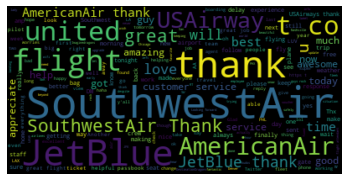

In [92]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

### Airline sentiment with stop words
You are given a dataset, called tweets, which contains customers' reviews and sentiments about airlines. It consists of two columns: airline_sentiment and text where the sentiment can be positive, negative or neutral, and the text is the text of the tweet.

In this exercise, you will create a BOW representation but will account for the stop words. Remember that stop words are not informative and you might want to remove them. That will result in a smaller vocabulary and eventually, fewer features. Keep in mind that we can enrich a default list of stop words with ones that are specific to our context.

### Instructions

Import the default list of English stop words.

Update the default list of stop words with the given list ['airline', 'airlines', '@'] to create my_stop_words.

Specify the stop words argument in the vectorizer.

In [93]:
tweets_data.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [96]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets_data.text)

# Create the bow representation
X_review = vect.transform(tweets_data.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
print(tweets_data.text)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


### Multiple text columns
In this exercise, you will continue working with the airline Twitter data. A data set tweets has been imported for you.

In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the text column, which contains the body of the tweet, there is a second text column, called negativereason. It contains the reason the customer left a negative review.

Your task is to build BOW representations for both columns and specify the required stop words.

### Instructions

Import the vectorizer package and the default list of English stop words.

Update the default list of English stop words and create the my_stop_words set.

Specify the stop words argument in the first vectorizer to the updated set, and in the second vectorizer - the default set of English stop words.

In [101]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=my_stop_words) 
vect1.fit(tweets_data.text)
# vect2.fit(tweets_data.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
# print(vect2.get_feature_names())

['zoom', 'zouowgv3q6', 'zpz78poeon', 'zqutus7epw', 'zrh', 'zrh_airport', 'zsdgzydnde', 'zsuztnaijq', 'ztrdwv0n4l', 'zukes', 'zurich', 'zv2pt6trk9', 'zv6cfpohl5', 'zvfmxnuelj', 'zzps5ywve2']


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2]:
tweets_data.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)





###  1. Capturing a token pattern
You may have noticed while working with the airline sentiment data from Twitter that the text contains many digits and other characters. Sometimes we may want to exclude them from our numeric representation.

### 2. String operators and comparisons
If we work with a string, how can we make sure we extract only certain characters? There are a few useful functionalities we will review here. We can use string comparison operators, such as .isaplha(), which returns true if a string is composed only of letters and false otherwise; .isdigits() returns true if a string is composed only of digits; and finally .isalnum() returns true if a string is composed only of alphanumeric characters, i.e. letters and digits.

### 3. String operators with list comprehension
String operators can improve some of the features we created earlier. As a reminder, in a previous video we used a list comprehension to iterate over each review of the product reviews dataset and create word tokens from each review. We can adjust our original code. If we want to retain only tokens consisting of letters, for example, we can use the .isaplha() operator in a second list comprehension. Since the result of the first list comprehension is a list of lists, we first need to iterate over the items in each inner list, filtering out those tokens that are not letters. This is what happens in the first part of the list comprehension, enclosed in the inner brackets. In the second part, we are iterating over the lists, basically saying that we want to perform this filtering across all lists in the word_tokens list. When we compare the length of the first item of word_tokens and the cleaned_tokens lists, we see that the filtering decreased the number of tokens, as we might expect.

### 4. Regular expressions
Regular expressions are a standard way to extract certain characters from a string. Python has a built-in package, called re, which allows you to work with regular expressions. We will not cover regular expressions in depth here but, a quick reminder on the syntax. We import the re package. Then imagine we have a string #Wonderfulday and we want to extract a hash(#) followed by any letter, capital or small. One standard way to do is by calling the search function on our string, specifying the regular expression. In our case, it starts with a #, and is followed by either an upper or lower case letter. When we print the result, we see that it is a match object, showing how large the match is - in our case, the span is 2, and also the exact characters that were matched.

### 5. Token pattern with a BOW
Our familiar CountVectorizer takes a regular expression as an argument. The default pattern used matches words that consists of at least two letters or numbers (\w) and which are separated by word boundaries (\b). It will ignore single-lettered words, and will split words such as 'don't' and 'haven't'. If we are fine with this default pattern, we don't need to change any arguments in the CountVectorizer. If we want to change it, we can specify the token_pattern argument. If we want the vectorizer to ignore digits and other characters and only consider words of two or more letters, we can use the specified token pattern. In fact, there are multiple ways to specify this. It doesn't mean the one specified here is the only correct or best way to accomplish this. Feel free to experiment with this. Note, however, that we need to add an 'r' before the regular expression itself.

In [7]:
string_1 =  "Garvit"
string_2 =  "Garvit Anand 880020"

print("Strinng 1:",string_1.isalpha())
print("String 2:", string_2.isalpha())
print("Strinng 3:",string_1.isalnum())
print("Strinng 4:",string_2.isdigit())


Strinng 1: True
String 2: False
Strinng 3: True
Strinng 4: False


### Specify the token pattern
In this exercise, you will work with the text column of the tweets dataset. Your task is to vectorize the object column using CountVectorizer. You will apply different patterns of tokens in the vectorizer. Remember that by specifying the token pattern, you can filter out characters.

The CountVectorizer has been imported for you.

### Instructions 1/2

Build a vectorizer from the text column, specifying the pattern of tokens to be equal to r'\b[^\d\W][^\d\W]'.

Build a vectorizer from the text column using the default values of the function's arguments.

Build a second vectorizer, specifying the pattern of tokens to be equal to r'\b[^\d\W][^\d\W]'.

In [11]:
# Build and fit the vectorizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS 

vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets_data.text)
vect.transform(tweets_data.text)
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  11893


C:\Users\Garvit Anand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets_data.text)
vect1.transform(tweets_data.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets_data.text)
vect2.transform(tweets_data.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


### String operators with the Twitter data
You continue working with the tweets data where the text column stores the content of each tweet.

Your task is to turn the text column into a list of tokens. Then, using string operators, remove all non-alphabetic characters from the created list of tokens.

## Instructions

Import the word tokenizing function.

Create word tokens from each tweet.

Filter out all non-alphabetic characters from the created list, i.e. retain only letters.

In [15]:
# Import the word tokenizing package
from nltk.tokenize import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets_data.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


### More string operators and Twitter
In this exercise, you will apply different string operators to three strings, selected from the tweets dataset. A tweets_list has been created for you.

You need to construct three new lists by applying different string operators:

a list retaining only letters

a list retaining only characters

a list retaining only digits

The required functions have been imported for you from nltk.

### Instructions

Create a list of the tokens from tweets_list.

In the list letters remove all digits and other characters, i.e. keep only letters.

Retain alphanumeric characters but remove all other characters in let_digits.

Create digits by removing letters and characters and keeping only numbers.

In [17]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## Stemming and lemmatization

### 1. Stemming and lemmatization

In a language, words are often derived from other words, meaning words can share the same root. When we create a numeric transformation of a text feature, we might want to strip a word down to its root. This is the topic of this lesson.

### 2. What is stemming?

This process is called stemming. More formally, stemming can be defined as the transformation of words to their root forms, even if the stem itself is not a valid word in the language. For example, staying, stays, stayed will be mapped to the root 'stay', and house, houses, housing will be mapped to the root 'hous'. In general, stemming will tend to chop off suffixes such as '-ed', '-ing', '-er', as well as plural or possessive forms.

### 3. What is lemmatization?
Lemmatization is quite a similar process to stemming, with the main difference that with lemmatization, the resulting roots are valid words in the language. Going back to our examples of words derived from 'stay', lemmatization reduces them to 'stay'; and words derived from 'house' are reduced to the noun 'house'.

### 4. Stemming vs. lemmatization
You might wonder when to use stemming and when lemmatization. The main difference is in the obtained roots. With lemmatization they are actual words and with stemming they might not be. So if in your problem it's important to retain words, not only roots, lemmatization would be more suitable. However, if you use nltk - which is what we will use in this course - stemming follows an algorithm which makes it faster than the lemmatization process in nltk. Furthermore, lemmatization is dependent on knowing the part of speech of the word you want to lemmatize. For example, whether we want to transform a noun, a verb, an adjective, etc.

### 5. Stemming of strings
One popular stemming library is the PorterStemmer in the nltk.stem package. The PorterStemmer is not the only stemmer in nltk but it's quite fast and easy to use, so it's often a standard choice. We call the PorterStemmer function and store it under the name porter. We can then call porter.stem on a string, for example, 'wonderful'. The result is 'wonder'.

### 6. Non-English stemmers
Stemming is possible using other languages as well, such as Danish, Dutch, French, Spanish, German, etc. To use foreign language stemmers we need to use the SnowballStemmer package. We can specify in the stemmer the foreign language we want to use. Then we apply the stem function on our string. For example, we have imported a Dutch stemmer and fed it a Dutch verb. The result is the root of the verb.

### 7. How to stem a sentence?
If you apply the PorterStemmer on a sentence, the result is the original sentence. We see nothing has changed about our 'Today is a wonderful day!' sentence. We need to stem each word in the sentence separately. Therefore, as a first step, we need to transform the sentence into tokens using the familiar word_tokenize function. In the second step, we apply the stemming function on each word of the sentence, using a list comprehension.

### 8. Lemmatization of a string
The lemmatization of strings is similar to stemming. We import the WordNetLemmatizer from the nltk.stem library. It uses the WordNet database to look up lemmas of words. We call the WordNetLemmatizer function and store it under the name WNlemmatizer. We can then call WNlemmatizer.lemmatize() on 'wonderful'. Note that we have specified a part-of-speech, given by the 'pos' argument. The default pos is noun, or 'n'. Here we specify an adjective, that's why pos = 'a'. The result is 'wonderful'. If you'd recall, stemming returned 'wonder' as a result.

In [21]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem("Wonderful")

# Snowbball stemmer for the foreign languages.

'wonder'

In [24]:
tokens =  word_tokenize("Today is a wonderful day")
stemmed_tokens =  [porter.stem(token) for token in tokens]
stemmed_tokens

['today', 'is', 'a', 'wonder', 'day']

In [33]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemit =  WordNetLemmatizer()
lemit.lemmatize("wonderful", pos = 'a')


[nltk_data] Downloading package wordnet to C:\Users\Garvit
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


'wonderful'

## Stems and lemmas from GoT
In this exercise, you are given a couple of sentences from George R.R. Martin's Game of Thrones. Your task is to create stems and lemmas from the given GoT string.

Remember that stems reduce a word to its root whereas lemmas produce an actual word. However, speed can differ significantly between the methods with stemming being much faster. In Steps 2 and 3, pay attention to the total time it takes to perform each operation. We're making use of the time.time() method to measure the time it takes to perform stemming and lemmatization.

### Instructions 1/3

Import the stemming and lemmatization functions.

Build a list of tokens from the GoT string.

Using list comprehension and the porter stemmer you imported, create the stemmed_tokens list.

Using list comprehension and the WNlemmatizer you imported, create the lem_tokens list.

In [34]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

GoT =  'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

In [35]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0009989738464355469
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [36]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  0.0
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']
